# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [2]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [4]:
def request(rqdict, source, remove_file=True):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./download/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        data=eua.CDMDataset(files[0]).to_dataframe()
        for i in files[1:]:
            da = eua.CDMDataset(i).to_dataframe()
            data = data.append(da)
            
    os.remove('download.zip')
    if remove_file:
        try:
           shutil.rmtree('./download/')
        except:
           print('Error while deleting directory')

    return data

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)
# Bethel 70219

In [5]:
loc = '70219'

---

## Loading Data:

The loading of the data shows if there is any differance in the retreival performance.

In [6]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

# CUON
## Requesting the whole temperature data of Bethel:
### Request took: 58 seconds
### 1948-01-01 03:00:00 - 2020-12-31 11:01:05 -> 7914621 messurements

In [7]:
cachworkaround = np.random.random_sample()
da_c = request({
    'variable': 'temperature',
    'statid': '70219',
#     'date': '20000101-20100101',
    'optional': ['bias_estimate','obs_minus_an','obs_minus_bg'],
    'cachworkaround': cachworkaround,
}, cuon)

2021-02-16 08:11:38,854 INFO Welcome to the CDS
2021-02-16 08:11:38,855 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-16 08:11:39,115 INFO Request is queued
2021-02-16 08:11:40,150 INFO Request is running
2021-02-16 08:12:28,700 INFO Request is completed
2021-02-16 08:12:28,701 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.comprehensive_upper_air.retrieve-1613459543.9814076-21524-8-9111cdfa-2f54-4384-9cf9-d62bc9bc04f8.zip to download.zip (335.2M)
2021-02-16 08:13:15,221 INFO Download rate 7.2M/s  


Request took: 97.10219478607178 seconds
2021-02-16 08:13:15,778 - upperair.cdm | __init__ - DEBUG - [OPEN] ./download/dest_0-20000-0-70219_air_temperature.nc


2021-02-16 08:13:15,778 DEBUG [OPEN] ./download/dest_0-20000-0-70219_air_temperature.nc


2021-02-16 08:13:15,792 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)


2021-02-16 08:13:15,792 INFO Reading Profile on slice(None, None, None)


2021-02-16 08:13:18,479 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


2021-02-16 08:13:18,479 DEBUG Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [8]:
da_c

bias_estimate        lat         lon  obs  obs_minus_an  \
0                  NaN  60.779999 -161.720001    0           NaN   
1                  NaN  60.779999 -161.720001    0           NaN   
2                  NaN  60.779999 -161.720001    0           NaN   
3                  NaN  60.779999 -161.720001    0           NaN   
4                  NaN  60.779999 -161.720001    0           NaN   
...                ...        ...         ...  ...           ...   
7914616       0.096410  60.785110 -161.840103    0      0.056077   
7914617       0.097644  60.785110 -161.840103    0      0.175619   
7914618       0.098877  60.785110 -161.840103    0      0.349774   
7914619       0.098877  60.785110 -161.840103    0      0.415929   
7914620       0.098877  60.785110 -161.840103    0      1.014395   

         obs_minus_bg      plev    report_id                 station_id  \
0                 NaN   30000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
1                 NaN   35000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
2                 NaN   40000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
3                 NaN   45000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
4                 NaN   50000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
...               ...       ...          ...                        ...   
7914616     -0.331416   99850.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914617     -0.203524   99950.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914618     -0.025194  100000.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914619      0.042631  100020.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914620      0.646107  100080.0  10000030322  BETHEL/BETHEL AIRPORT, AK   

                 ta                time trajectory_label  
0        217.850006 1948-01-01 03:00:00      30000000001  
1        219.850006 1948-01-01 03:00:00      30000000002  
2        225.250000 1948-01-01 03:00:00      30000000002  
3        231.350006 1948-01-01 03:00:00      30000000002  
4        237.250000 1948-01-01 03:00:00      30000000002  
...             ...                 ...              ...  
7914616  268.850006 2020-12-31 11:01:05      30000000001  
7914617  268.839996 2020-12-31 11:01:05      30000000001  
7914618  268.950012 2020-12-31 11:01:05      30000000001  
7914619  268.989990 2020-12-31 11:01:05      30000000001  
7914620  269.510010 2020-12-31 11:01:05      30000000001  

[7914621 rows x 12 columns]

# IGRA
## Requesting the whole temperature data of Bethel:
### Request took: 620 seconds
### 1978-04-01 00:00:00 - 2020-04-13 12:00:00 -> 4089494 messurements

In [9]:
da_i = request({
    'source': 'IGRA',
    'variable': ['air_temperature'],
    'station_name': ['USM00070219'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 08:13:40,669 INFO Welcome to the CDS
2021-02-16 08:13:40,669 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 08:13:40,753 INFO Request is completed
2021-02-16 08:13:40,753 INFO Downloading http://136.156.132.176/cache-compute-0000/cache/data1/adaptor.insitu_reference.retrieve_test-1613402473.2150443-19699-13-237927d1-3e80-4c7b-be19-9883948d0452.zip to download.zip (30.4M)
2021-02-16 08:13:45,064 INFO Download rate 7.1M/s   


Request took: 5.317947626113892 seconds


In [10]:
da_i

station_name    report_timestamp  report_id   longitude  latitude  \
index                                                                       
0        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
1        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
2        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
3        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
4        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
...              ...                 ...        ...         ...       ...   
4089489  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089490  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089491  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089492  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089493  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   

         air_pressure  air_temperature  
index                                   
0               910.0       226.649994  
1              1000.0       226.050003  
2              1250.0       221.750000  
3              2000.0       219.649994  
4              3000.0       219.750000  
...               ...              ...  
4089489        5349.0       219.149994  
4089490         736.0       225.850006  
4089491        3000.0       219.449997  
4089492       12914.0       219.850006  
4089493       71739.0       260.850006  

[4089494 rows x 7 columns]

# IGRA Harmonized
## Requesting the whole temperature data of Bethel:
### Request took: 259 seconds
### 1978-04-02 00:00:00 - 2020-04-12 11:01:00 -> 2093695 messurements

In [11]:
da_ih = request({
    'source': 'IGRA_H',
    'variable': ['air_temperature'],
    'station_name': ['USM00070219'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 08:13:48,582 INFO Welcome to the CDS
2021-02-16 08:13:48,582 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 08:13:48,762 INFO Request is completed
2021-02-16 08:13:48,763 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.insitu_reference.retrieve_test-1613403060.3193474-18394-15-f5d8124e-2858-40c5-b3db-639cfb95f25e.zip to download.zip (28.6M)
2021-02-16 08:13:50,775 INFO Download rate 14.2M/s  


Request took: 3.025355815887451 seconds


In [12]:
da_ih

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
1        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
2        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
3        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
4        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
...              ...                 ...                     ...        ...   
2093690  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093691  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093692  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093693  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093694  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   

          longitude   latitude  height_of_station_above_sea_level  \
index                                                               
0       -161.843994  60.777802                               33.5   
1       -161.843994  60.777802                               33.5   
2       -161.843994  60.777802                               33.5   
3       -161.843994  60.777802                               33.5   
4       -161.843994  60.777802                               33.5   
...             ...        ...                                ...   
2093690 -161.843994  60.777802                               33.5   
2093691 -161.843994  60.777802                               33.5   
2093692 -161.843994  60.777802                               33.5   
2093693 -161.843994  60.777802                               33.5   
2093694 -161.843994  60.777802                               33.5   

         air_pressure  air_temperature  
index                                   
0               47800       244.949997  
1               39100       233.350006  
2               10000       221.149994  
3                7900       222.750000  
4                2600       229.850006  
...               ...              ...  
2093690         18339       222.850006  
2093691         98662       274.250000  
2093692         34386       229.350006  
2093693         79469       264.950012  
2093694         41456       238.649994  

[2093695 rows x 9 columns]

---

In [13]:
comp = da_c
igra = da_i
igrah = da_ih

In [14]:
igra

station_name    report_timestamp  report_id   longitude  latitude  \
index                                                                       
0        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
1        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
2        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
3        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
4        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
...              ...                 ...        ...         ...       ...   
4089489  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089490  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089491  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089492  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089493  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   

         air_pressure  air_temperature  
index                                   
0               910.0       226.649994  
1              1000.0       226.050003  
2              1250.0       221.750000  
3              2000.0       219.649994  
4              3000.0       219.750000  
...               ...              ...  
4089489        5349.0       219.149994  
4089490         736.0       225.850006  
4089491        3000.0       219.449997  
4089492       12914.0       219.850006  
4089493       71739.0       260.850006  

[4089494 rows x 7 columns]

In [15]:
igrah

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
1        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
2        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
3        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
4        USM00070219 1978-01-02 00:00:00  1978-01-02 00:00:00+00   11846803   
...              ...                 ...                     ...        ...   
2093690  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093691  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093692  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093693  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   
2093694  USM00070219 2020-04-12 12:00:00  2020-04-12 11:01:00+00   11847871   

          longitude   latitude  height_of_station_above_sea_level  \
index                                                               
0       -161.843994  60.777802                               33.5   
1       -161.843994  60.777802                               33.5   
2       -161.843994  60.777802                               33.5   
3       -161.843994  60.777802                               33.5   
4       -161.843994  60.777802                               33.5   
...             ...        ...                                ...   
2093690 -161.843994  60.777802                               33.5   
2093691 -161.843994  60.777802                               33.5   
2093692 -161.843994  60.777802                               33.5   
2093693 -161.843994  60.777802                               33.5   
2093694 -161.843994  60.777802                               33.5   

         air_pressure  air_temperature  
index                                   
0               47800       244.949997  
1               39100       233.350006  
2               10000       221.149994  
3                7900       222.750000  
4                2600       229.850006  
...               ...              ...  
2093690         18339       222.850006  
2093691         98662       274.250000  
2093692         34386       229.350006  
2093693         79469       264.950012  
2093694         41456       238.649994  

[2093695 rows x 9 columns]

In [16]:
orig_cols_comp = comp.columns
print('orig_cols_comp: ', orig_cols_comp)
orig_cols_igra = igrah.columns
print('orig_cols_igra: ', orig_cols_igra)

df = pandas.merge(igra, igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
print('getting igra and igrah to same len')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

new_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igrah.columns=newcols
print('new_igrah')
display(new_igrah)

new_igra = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igra.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igra.columns=newcols
print('new_igra')
display(new_igra)

print('cutting those measurments out, which are both in igrah and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igrah.columns=newcols
for col in adj_igrah.columns:
    if not col in orig_cols_igra:
        adj_igrah = adj_igrah.drop(columns=col)
print('adj_igrah')
display(adj_igrah)

adj_comp = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_comp.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_comp.columns=newcols
adj_comp = adj_comp.rename(columns={"report_timestamp": "time", "air_pressure": "plev"})
for col in adj_comp.columns:
    if not col in orig_cols_comp:
        adj_comp = adj_comp.drop(columns=col)
print('adj_comp')
display(adj_comp)

print('cutting those measurments out, which are both in igra and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igra, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igra = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igra.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igra.columns=newcols
for col in adj_igra.columns:
    if not col in orig_cols_igra:
        adj_igra = adj_igra.drop(columns=col)
print('adj_igra')
display(adj_igra)


# igra = igra[df.Exist]
# igra

# comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"})

orig_cols_comp:  Index(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg',
       'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory_label'],
      dtype='object')
orig_cols_igra:  Index(['station_name', 'report_timestamp', 'actual_time', 'report_id',
       'longitude', 'latitude', 'height_of_station_above_sea_level',
       'air_pressure', 'air_temperature'],
      dtype='object')
getting igra and igrah to same len


station_name_x    report_timestamp  report_id_x  longitude_x  \
0          USM00070219 1978-04-01 00:00:00     32058993  -161.839996   
1          USM00070219 1978-04-01 00:00:00     32058993  -161.839996   
2          USM00070219 1978-04-01 00:00:00     32058993  -161.839996   
3          USM00070219 1978-04-01 00:00:00     32058993  -161.839996   
4          USM00070219 1978-04-01 00:00:00     32058993  -161.839996   
...                ...                 ...          ...          ...   
4089489    USM00070219 2020-04-13 12:00:00     32046144  -161.839996   
4089490    USM00070219 2020-04-13 12:00:00     32046144  -161.839996   
4089491    USM00070219 2020-04-13 12:00:00     32046144  -161.839996   
4089492    USM00070219 2020-04-13 12:00:00     32046144  -161.839996   
4089493    USM00070219 2020-04-13 12:00:00     32046144  -161.839996   

         latitude_x  air_pressure  air_temperature_x station_name_y  \
0            60.785         910.0         226.649994            NaN   
1            60.785        1000.0         226.050003    USM00070219   
2            60.785        1250.0         221.750000    USM00070219   
3            60.785        2000.0         219.649994    USM00070219   
4            60.785        3000.0         219.750000    USM00070219   
...             ...           ...                ...            ...   
4089489      60.785        5349.0         219.149994    USM00070219   
4089490      60.785         736.0         225.850006            NaN   
4089491      60.785        3000.0         219.449997    USM00070219   
4089492      60.785       12914.0         219.850006    USM00070219   
4089493      60.785       71739.0         260.850006    USM00070219   

                    actual_time  report_id_y  longitude_y  latitude_y  \
0                           NaN          NaN          NaN         NaN   
1        1978-04-01 00:00:00+00   11841438.0  -161.843994   60.777802   
2        1978-04-01 00:00:00+00   11841438.0  -161.843994   60.777802   
3        1978-04-01 00:00:00+00   11841438.0  -161.843994   60.777802   
4        1978-04-01 00:00:00+00   11841438.0  -161.843994   60.777802   
...                         ...          ...          ...         ...   
4089489  2020-04-13 11:01:00+00   11852561.0  -161.843994   60.777802   
4089490                     NaN          NaN          NaN         NaN   
4089491  2020-04-13 11:01:00+00   11852561.0  -161.843994   60.777802   
4089492  2020-04-13 11:01:00+00   11852561.0  -161.843994   60.777802   
4089493  2020-04-13 11:01:00+00   11852561.0  -161.843994   60.777802   

         height_of_station_above_sea_level  air_temperature_y      Exist  
0                                      NaN                NaN  left_only  
1                                     33.5         226.050003       both  
2                                     33.5         221.750000       both  
3                                     33.5         219.649994       both  
4                                     33.5         219.750000       both  
...                                    ...                ...        ...  
4089489                               33.5         219.149994       both  
4089490                                NaN                NaN  left_only  
4089491                               33.5         219.449997       both  
4089492                               33.5         219.850006       both  
4089493                               33.5         260.850006       both  

[4089494 rows x 15 columns]

new_igrah


report_timestamp  air_pressure station_name  \
1       1978-04-01 00:00:00        1000.0  USM00070219   
2       1978-04-01 00:00:00        1250.0  USM00070219   
3       1978-04-01 00:00:00        2000.0  USM00070219   
4       1978-04-01 00:00:00        3000.0  USM00070219   
5       1978-04-01 00:00:00        3900.0  USM00070219   
...                     ...           ...          ...   
4089487 2020-04-13 12:00:00        3511.0  USM00070219   
4089489 2020-04-13 12:00:00        5349.0  USM00070219   
4089491 2020-04-13 12:00:00        3000.0  USM00070219   
4089492 2020-04-13 12:00:00       12914.0  USM00070219   
4089493 2020-04-13 12:00:00       71739.0  USM00070219   

                    actual_time   report_id   longitude   latitude  \
1        1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
2        1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
3        1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
4        1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
5        1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
...                         ...         ...         ...        ...   
4089487  2020-04-13 11:01:00+00  11852561.0 -161.843994  60.777802   
4089489  2020-04-13 11:01:00+00  11852561.0 -161.843994  60.777802   
4089491  2020-04-13 11:01:00+00  11852561.0 -161.843994  60.777802   
4089492  2020-04-13 11:01:00+00  11852561.0 -161.843994  60.777802   
4089493  2020-04-13 11:01:00+00  11852561.0 -161.843994  60.777802   

         height_of_station_above_sea_level  air_temperature  
1                                     33.5       226.050003  
2                                     33.5       221.750000  
3                                     33.5       219.649994  
4                                     33.5       219.750000  
5                                     33.5       218.949997  
...                                    ...              ...  
4089487                               33.5       220.449997  
4089489                               33.5       219.149994  
4089491                               33.5       219.449997  
4089492                               33.5       219.850006  
4089493                               33.5       260.850006  

[2049760 rows x 9 columns]

new_igra


station_name    report_timestamp  report_id   longitude  latitude  \
1        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
2        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
3        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
4        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
5        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
...              ...                 ...        ...         ...       ...   
4089487  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089489  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089491  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089492  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   
4089493  USM00070219 2020-04-13 12:00:00   32046144 -161.839996    60.785   

         air_pressure  air_temperature             actual_time  \
1              1000.0       226.050003  1978-04-01 00:00:00+00   
2              1250.0       221.750000  1978-04-01 00:00:00+00   
3              2000.0       219.649994  1978-04-01 00:00:00+00   
4              3000.0       219.750000  1978-04-01 00:00:00+00   
5              3900.0       218.949997  1978-04-01 00:00:00+00   
...               ...              ...                     ...   
4089487        3511.0       220.449997  2020-04-13 11:01:00+00   
4089489        5349.0       219.149994  2020-04-13 11:01:00+00   
4089491        3000.0       219.449997  2020-04-13 11:01:00+00   
4089492       12914.0       219.850006  2020-04-13 11:01:00+00   
4089493       71739.0       260.850006  2020-04-13 11:01:00+00   

         height_of_station_above_sea_level  
1                                     33.5  
2                                     33.5  
3                                     33.5  
4                                     33.5  
5                                     33.5  
...                                    ...  
4089487                               33.5  
4089489                               33.5  
4089491                               33.5  
4089492                               33.5  
4089493                               33.5  

[2049760 rows x 9 columns]

cutting those measurments out, which are both in igrah and comp


bias_estimate        lat         lon  obs  obs_minus_an  \
0                  NaN  60.779999 -161.720001    0           NaN   
1                  NaN  60.779999 -161.720001    0           NaN   
2                  NaN  60.779999 -161.720001    0           NaN   
3                  NaN  60.779999 -161.720001    0           NaN   
4                  NaN  60.779999 -161.720001    0           NaN   
...                ...        ...         ...  ...           ...   
7914616       0.096410  60.785110 -161.840103    0      0.056077   
7914617       0.097644  60.785110 -161.840103    0      0.175619   
7914618       0.098877  60.785110 -161.840103    0      0.349774   
7914619       0.098877  60.785110 -161.840103    0      0.415929   
7914620       0.098877  60.785110 -161.840103    0      1.014395   

         obs_minus_bg  air_pressure  report_id_x                 station_id  \
0                 NaN       30000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
1                 NaN       35000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
2                 NaN       40000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
3                 NaN       45000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
4                 NaN       50000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
...               ...           ...          ...                        ...   
7914616     -0.331416       99850.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914617     -0.203524       99950.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914618     -0.025194      100000.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914619      0.042631      100020.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914620      0.646107      100080.0  10000030322  BETHEL/BETHEL AIRPORT, AK   

                 ta    report_timestamp trajectory_label station_name  \
0        217.850006 1948-01-01 03:00:00      30000000001          NaN   
1        219.850006 1948-01-01 03:00:00      30000000002          NaN   
2        225.250000 1948-01-01 03:00:00      30000000002          NaN   
3        231.350006 1948-01-01 03:00:00      30000000002          NaN   
4        237.250000 1948-01-01 03:00:00      30000000002          NaN   
...             ...                 ...              ...          ...   
7914616  268.850006 2020-12-31 11:01:05      30000000001          NaN   
7914617  268.839996 2020-12-31 11:01:05      30000000001          NaN   
7914618  268.950012 2020-12-31 11:01:05      30000000001          NaN   
7914619  268.989990 2020-12-31 11:01:05      30000000001          NaN   
7914620  269.510010 2020-12-31 11:01:05      30000000001          NaN   

        actual_time  report_id_y  longitude  latitude  \
0               NaN          NaN        NaN       NaN   
1               NaN          NaN        NaN       NaN   
2               NaN          NaN        NaN       NaN   
3               NaN          NaN        NaN       NaN   
4               NaN          NaN        NaN       NaN   
...             ...          ...        ...       ...   
7914616         NaN          NaN        NaN       NaN   
7914617         NaN          NaN        NaN       NaN   
7914618         NaN          NaN        NaN       NaN   
7914619         NaN          NaN        NaN       NaN   
7914620         NaN          NaN        NaN       NaN   

         height_of_station_above_sea_level  air_temperature      Exist  
0                                      NaN              NaN  left_only  
1                                      NaN              NaN  left_only  
2                                      NaN              NaN  left_only  
3                                      NaN              NaN  left_only  
4                                      NaN              NaN  left_only  
...                                    ...              ...        ...  
7914616                                NaN              NaN  left_only  
7914617                                NaN              NaN  left_only  
7914618                 

adj_igrah


air_pressure    report_timestamp station_name  \
753229         1000.0 1978-04-01 00:00:00  USM00070219   
753230         1250.0 1978-04-01 00:00:00  USM00070219   
753232         2000.0 1978-04-01 00:00:00  USM00070219   
753234         3000.0 1978-04-01 00:00:00  USM00070219   
753235         3900.0 1978-04-01 00:00:00  USM00070219   
...               ...                 ...          ...   
4697683       70000.0 2019-11-03 12:00:00  USM00070219   
4697695       85000.0 2019-11-03 12:00:00  USM00070219   
4697700       92500.0 2019-11-03 12:00:00  USM00070219   
4697704       95500.0 2019-11-03 12:00:00  USM00070219   
4697712      100000.0 2019-11-03 12:00:00  USM00070219   

                    actual_time   report_id   longitude   latitude  \
753229   1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
753230   1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
753232   1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
753234   1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
753235   1978-04-01 00:00:00+00  11841438.0 -161.843994  60.777802   
...                         ...         ...         ...        ...   
4697683  2019-11-03 11:08:00+00  11834824.0 -161.843994  60.777802   
4697695  2019-11-03 11:08:00+00  11834824.0 -161.843994  60.777802   
4697700  2019-11-03 11:08:00+00  11834824.0 -161.843994  60.777802   
4697704  2019-11-03 11:08:00+00  11834824.0 -161.843994  60.777802   
4697712  2019-11-03 11:08:00+00  11834824.0 -161.843994  60.777802   

         height_of_station_above_sea_level  air_temperature  
753229                                33.5       226.050003  
753230                                33.5       221.750000  
753232                                33.5       219.649994  
753234                                33.5       219.750000  
753235                                33.5       218.949997  
...                                    ...              ...  
4697683                               33.5       263.850006  
4697695                               33.5       270.850006  
4697700                               33.5       273.850006  
4697704                               33.5       274.250000  
4697712                               33.5       265.250000  

[589076 rows x 9 columns]

adj_comp


bias_estimate        lat         lon  obs  obs_minus_an  \
753229        0.909084  60.779999 -161.800003    0      2.715544   
753230        0.810499  60.779999 -161.800003    0      0.628001   
753232        0.534287  60.779999 -161.800003    0      1.566232   
753234        0.221772  60.779999 -161.800003    0      0.909536   
753235        0.276749  60.779999 -161.800003    0     -0.171390   
...                ...        ...         ...  ...           ...   
4697683      -0.058887  60.779999 -161.839996    0      0.714629   
4697695      -0.013333  60.779999 -161.839996    0      0.072498   
4697700      -0.007826  60.779999 -161.839996    0     -0.096355   
4697704      -0.001443  60.779999 -161.839996    0      0.111570   
4697712       0.009647  60.779999 -161.839996    0     -1.208709   

         obs_minus_bg      plev    report_id                 station_id  \
753229       3.524003    1000.0  20000015055  BETHEL/BETHEL AIRPORT, AK   
753230       0.980933    1250.0  20000015055  BETHEL/BETHEL AIRPORT, AK   
753232       1.729382    2000.0  20000015055  BETHEL/BETHEL AIRPORT, AK   
753234       1.185458    3000.0  20000015055  BETHEL/BETHEL AIRPORT, AK   
753235      -0.179232    3900.0  20000015055  BETHEL/BETHEL AIRPORT, AK   
...               ...       ...          ...                        ...   
4697683      0.795761   70000.0  10000029515  BETHEL/BETHEL AIRPORT, AK   
4697695     -0.018539   85000.0  10000029515  BETHEL/BETHEL AIRPORT, AK   
4697700      0.643978   92500.0  10000029515  BETHEL/BETHEL AIRPORT, AK   
4697704      0.845988   95500.0  10000029515  BETHEL/BETHEL AIRPORT, AK   
4697712     -0.771123  100000.0  10000029515  BETHEL/BETHEL AIRPORT, AK   

                 ta                time trajectory_label  
753229   226.100006 1978-04-01 00:00:00      20000015055  
753230   221.800003 1978-04-01 00:00:00      20000015055  
753232   219.699997 1978-04-01 00:00:00      20000015055  
753234   219.800003 1978-04-01 00:00:00      20000015055  
753235   219.000000 1978-04-01 00:00:00      20000015055  
...             ...                 ...              ...  
4697683  263.899994 2019-11-03 12:00:00      10000029515  
4697695  270.899994 2019-11-03 12:00:00      10000029515  
4697700  273.799988 2019-11-03 12:00:00      10000029515  
4697704  274.200012 2019-11-03 12:00:00      10000029515  
4697712  265.299988 2019-11-03 12:00:00      10000029515  

[589076 rows x 12 columns]

cutting those measurments out, which are both in igra and comp


bias_estimate        lat         lon  obs  obs_minus_an  \
0                  NaN  60.779999 -161.720001    0           NaN   
1                  NaN  60.779999 -161.720001    0           NaN   
2                  NaN  60.779999 -161.720001    0           NaN   
3                  NaN  60.779999 -161.720001    0           NaN   
4                  NaN  60.779999 -161.720001    0           NaN   
...                ...        ...         ...  ...           ...   
7914616       0.096410  60.785110 -161.840103    0      0.056077   
7914617       0.097644  60.785110 -161.840103    0      0.175619   
7914618       0.098877  60.785110 -161.840103    0      0.349774   
7914619       0.098877  60.785110 -161.840103    0      0.415929   
7914620       0.098877  60.785110 -161.840103    0      1.014395   

         obs_minus_bg  air_pressure  report_id_x                 station_id  \
0                 NaN       30000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
1                 NaN       35000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
2                 NaN       40000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
3                 NaN       45000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
4                 NaN       50000.0  60000000000  BETHEL/BETHEL AIRPORT, AK   
...               ...           ...          ...                        ...   
7914616     -0.331416       99850.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914617     -0.203524       99950.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914618     -0.025194      100000.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914619      0.042631      100020.0  10000030322  BETHEL/BETHEL AIRPORT, AK   
7914620      0.646107      100080.0  10000030322  BETHEL/BETHEL AIRPORT, AK   

                 ta    report_timestamp trajectory_label station_name  \
0        217.850006 1948-01-01 03:00:00      30000000001          NaN   
1        219.850006 1948-01-01 03:00:00      30000000002          NaN   
2        225.250000 1948-01-01 03:00:00      30000000002          NaN   
3        231.350006 1948-01-01 03:00:00      30000000002          NaN   
4        237.250000 1948-01-01 03:00:00      30000000002          NaN   
...             ...                 ...              ...          ...   
7914616  268.850006 2020-12-31 11:01:05      30000000001          NaN   
7914617  268.839996 2020-12-31 11:01:05      30000000001          NaN   
7914618  268.950012 2020-12-31 11:01:05      30000000001          NaN   
7914619  268.989990 2020-12-31 11:01:05      30000000001          NaN   
7914620  269.510010 2020-12-31 11:01:05      30000000001          NaN   

         report_id_y  longitude  latitude  air_temperature actual_time  \
0                NaN        NaN       NaN              NaN         NaN   
1                NaN        NaN       NaN              NaN         NaN   
2                NaN        NaN       NaN              NaN         NaN   
3                NaN        NaN       NaN              NaN         NaN   
4                NaN        NaN       NaN              NaN         NaN   
...              ...        ...       ...              ...         ...   
7914616          NaN        NaN       NaN              NaN         NaN   
7914617          NaN        NaN       NaN              NaN         NaN   
7914618          NaN        NaN       NaN              NaN         NaN   
7914619          NaN        NaN       NaN              NaN         NaN   
7914620          NaN        NaN       NaN              NaN         NaN   

         height_of_station_above_sea_level      Exist  
0                                      NaN  left_only  
1                                      NaN  left_only  
2                                      NaN  left_only  
3                                      NaN  left_only  
4                                      NaN  left_only  
...                                    ...        ...  
7914616                                NaN  left_only  
7914617                      

adj_igra


air_pressure    report_timestamp station_name   report_id  \
753229         1000.0 1978-04-01 00:00:00  USM00070219  32058993.0   
753230         1250.0 1978-04-01 00:00:00  USM00070219  32058993.0   
753232         2000.0 1978-04-01 00:00:00  USM00070219  32058993.0   
753234         3000.0 1978-04-01 00:00:00  USM00070219  32058993.0   
753235         3900.0 1978-04-01 00:00:00  USM00070219  32058993.0   
...               ...                 ...          ...         ...   
4697683       70000.0 2019-11-03 12:00:00  USM00070219  32031006.0   
4697695       85000.0 2019-11-03 12:00:00  USM00070219  32031006.0   
4697700       92500.0 2019-11-03 12:00:00  USM00070219  32031006.0   
4697704       95500.0 2019-11-03 12:00:00  USM00070219  32031006.0   
4697712      100000.0 2019-11-03 12:00:00  USM00070219  32031006.0   

          longitude  latitude  air_temperature             actual_time  \
753229  -161.839996    60.785       226.050003  1978-04-01 00:00:00+00   
753230  -161.839996    60.785       221.750000  1978-04-01 00:00:00+00   
753232  -161.839996    60.785       219.649994  1978-04-01 00:00:00+00   
753234  -161.839996    60.785       219.750000  1978-04-01 00:00:00+00   
753235  -161.839996    60.785       218.949997  1978-04-01 00:00:00+00   
...             ...       ...              ...                     ...   
4697683 -161.839996    60.785       263.850006  2019-11-03 11:08:00+00   
4697695 -161.839996    60.785       270.850006  2019-11-03 11:08:00+00   
4697700 -161.839996    60.785       273.850006  2019-11-03 11:08:00+00   
4697704 -161.839996    60.785       274.250000  2019-11-03 11:08:00+00   
4697712 -161.839996    60.785       265.250000  2019-11-03 11:08:00+00   

         height_of_station_above_sea_level  
753229                                33.5  
753230                                33.5  
753232                                33.5  
753234                                33.5  
753235                                33.5  
...                                    ...  
4697683                               33.5  
4697695                               33.5  
4697700                               33.5  
4697704                               33.5  
4697712                               33.5  

[589076 rows x 9 columns]

---

## Displaying and comparing the data on different pressure levels:
We will display the untouched data and also the data, where CUAN and IGRA have available data and compare both. <br>


In [17]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
# missing_i = []
# missing_c = []
comp_original = []
igrah_original = []
igra_original = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    igra_h_adjusted.append(adj_igrah[adj_igrah.air_pressure == i])
    igrah_original.append(new_igrah[new_igrah.air_pressure == i])
    
    igra_adjusted.append(adj_igra[adj_igra.air_pressure == i])
    igra_original.append(new_igra[new_igra.air_pressure == i])
    
    comp_adjusted.append(adj_comp[adj_comp.plev == i])
    comp_original.append(comp[comp.plev == i])
    

--- 
pressure level: 10000
--- 
pressure level: 20000
--- 
pressure level: 50000
--- 
pressure level: 85000


---

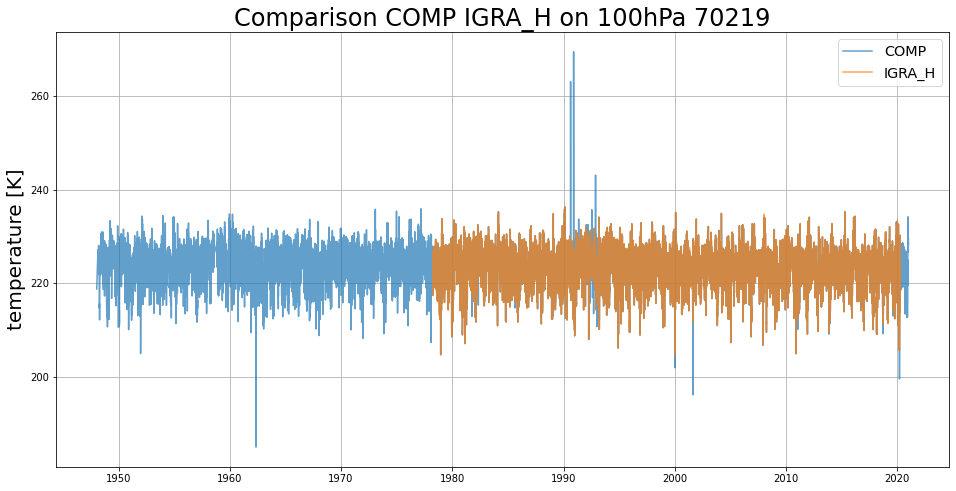

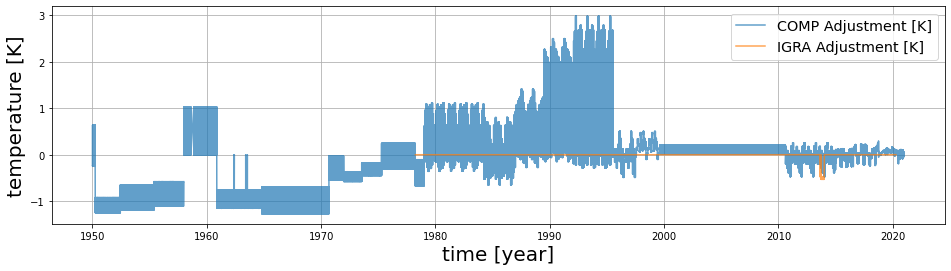

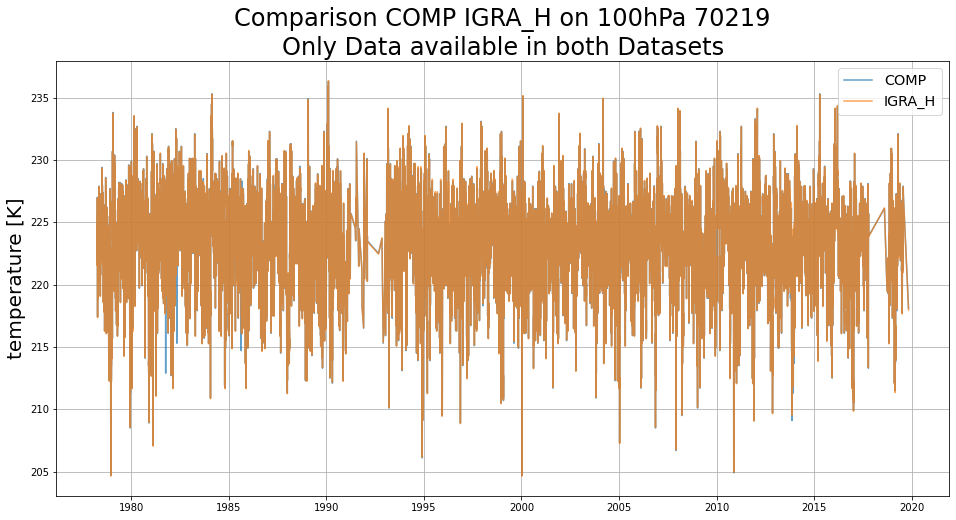

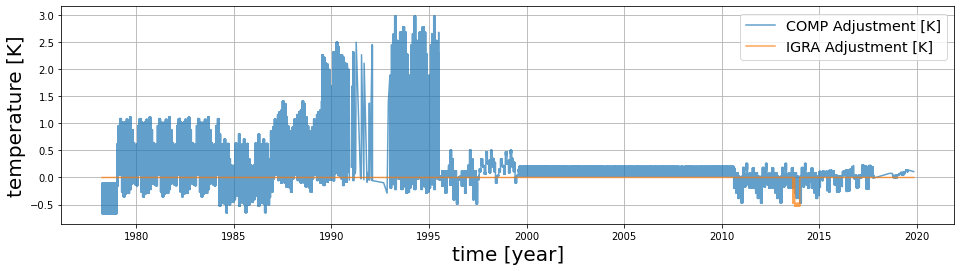

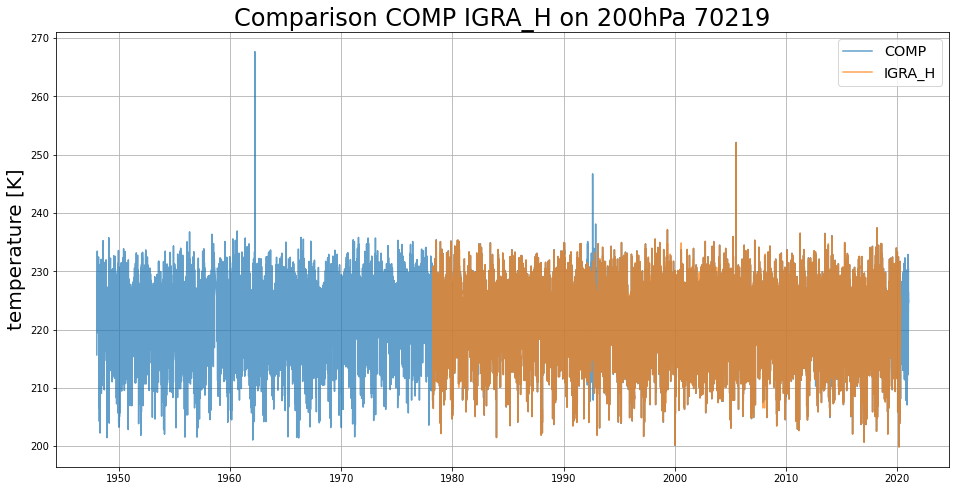

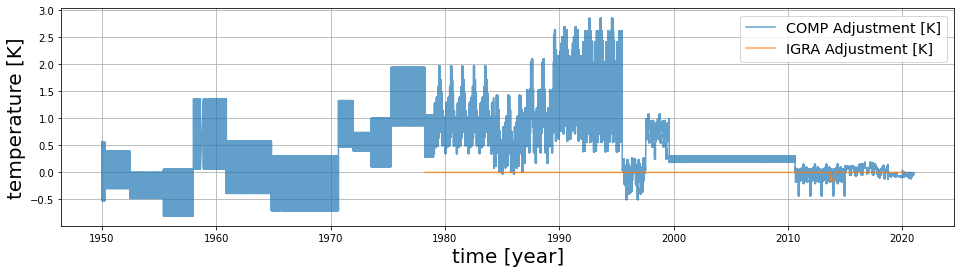

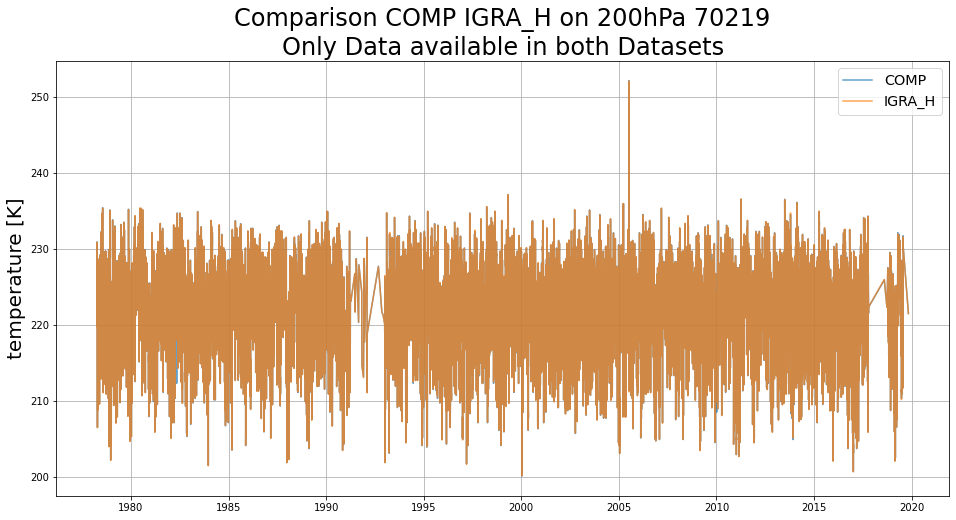

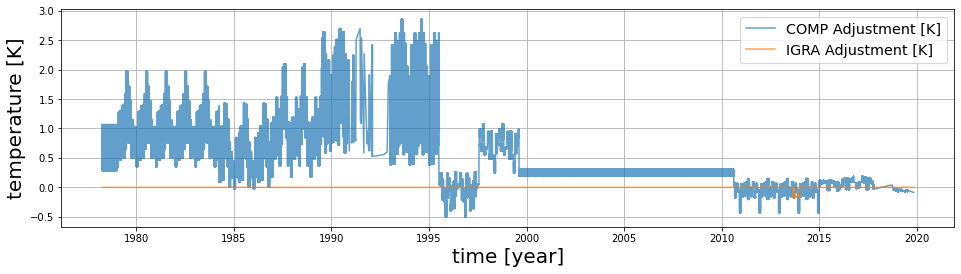

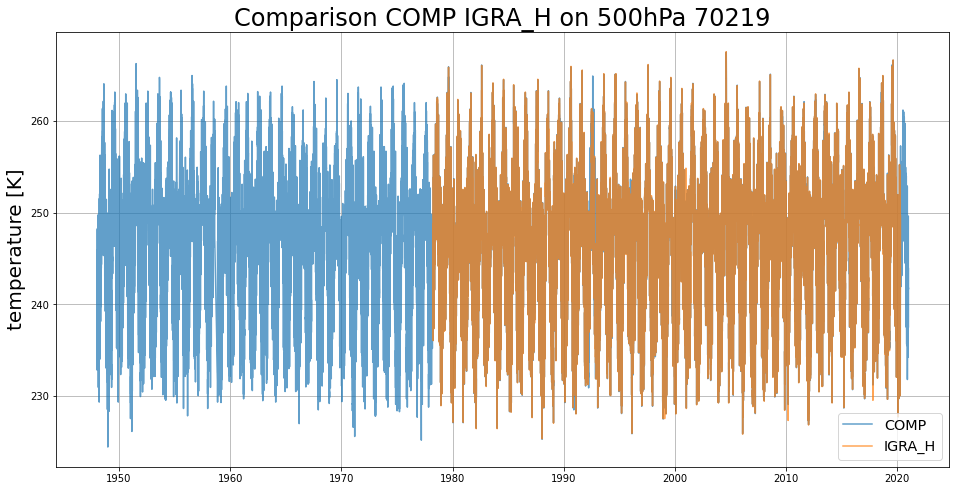

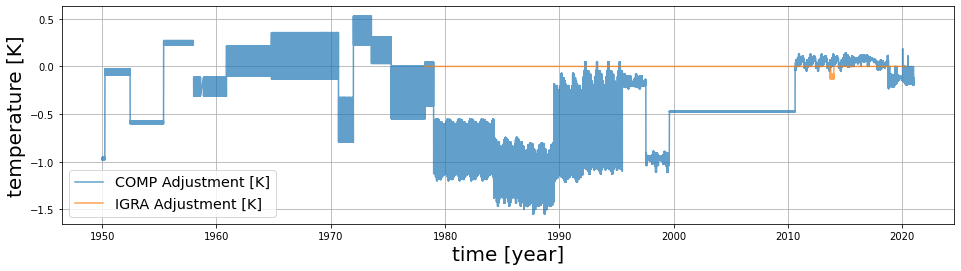

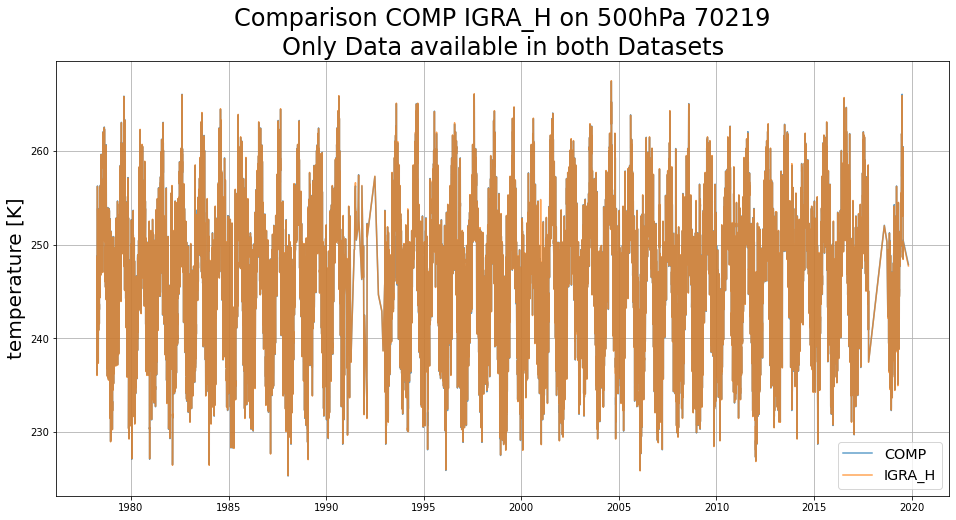

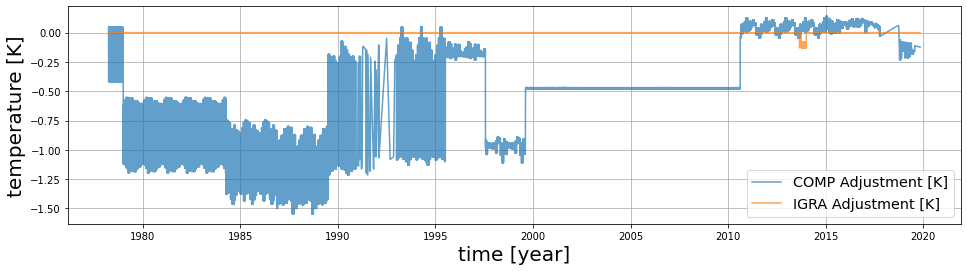

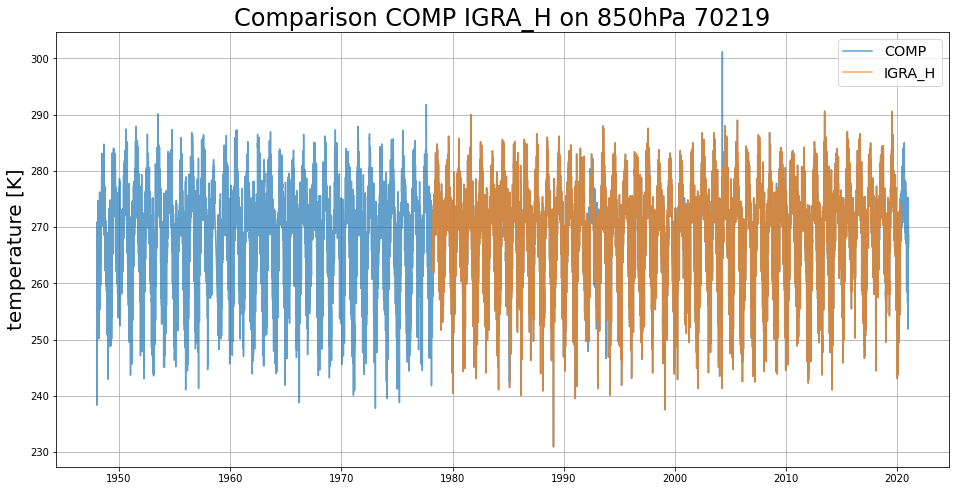

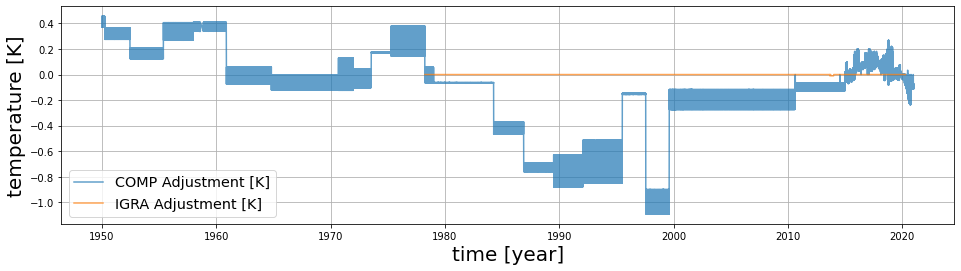

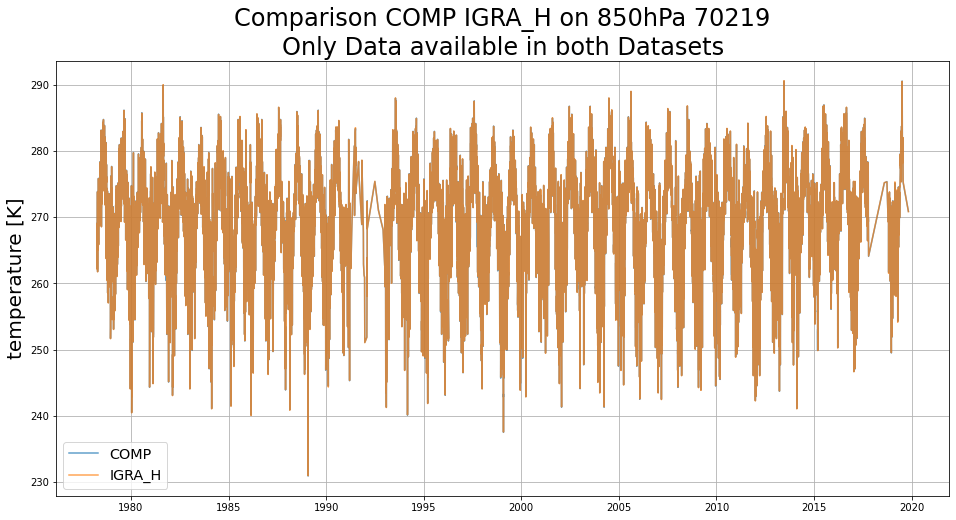

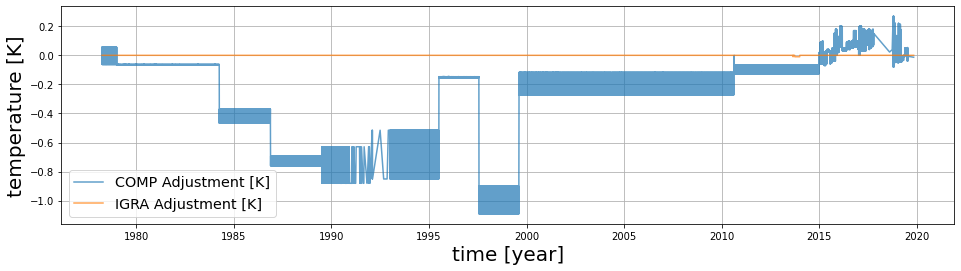

In [18]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_original[i]
    b = igrah_original[i]
    c = comp_original[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(b.report_timestamp, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(b.report_timestamp, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


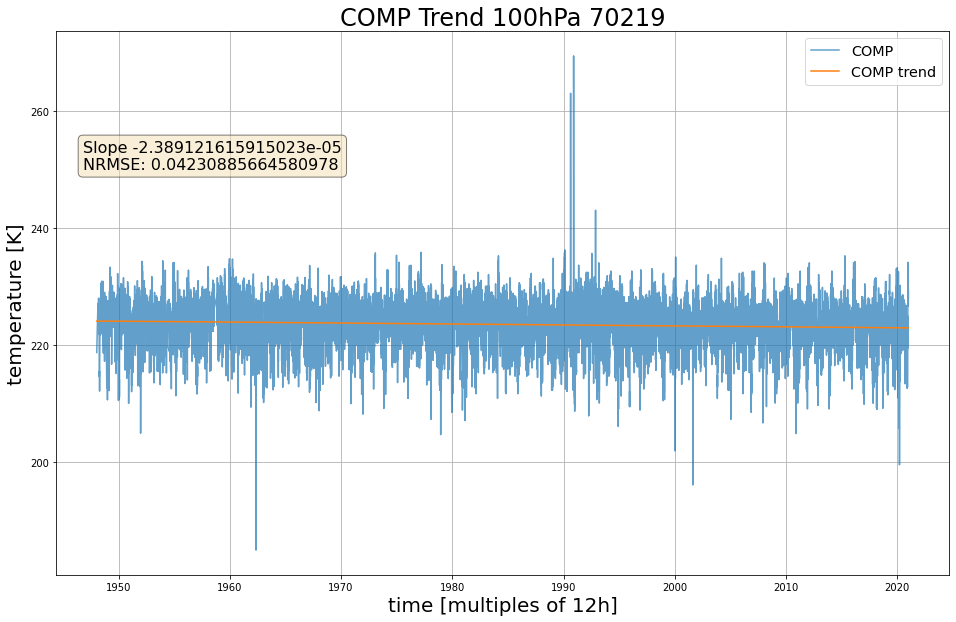

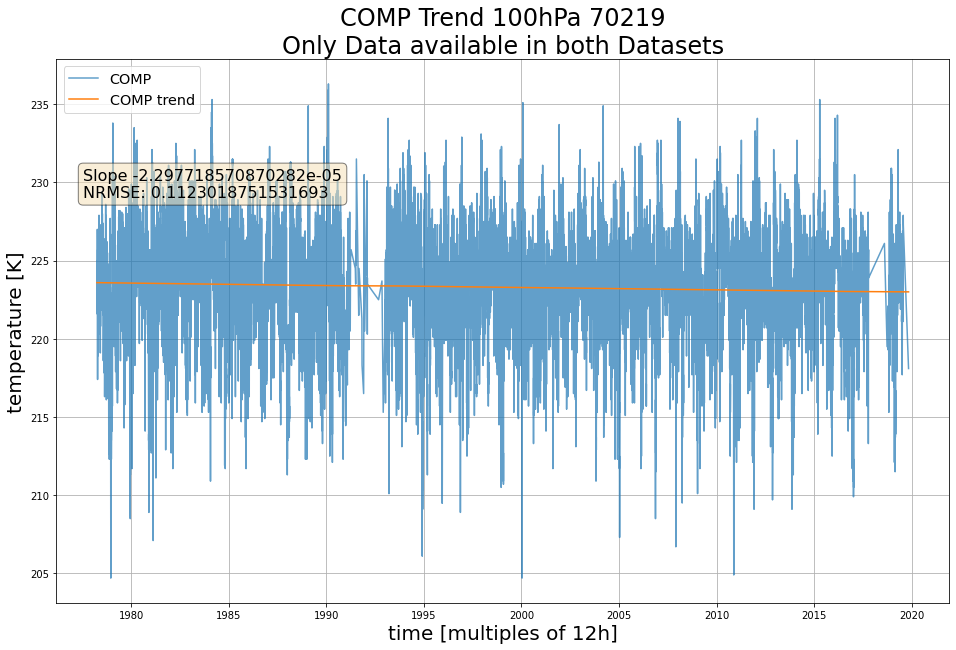

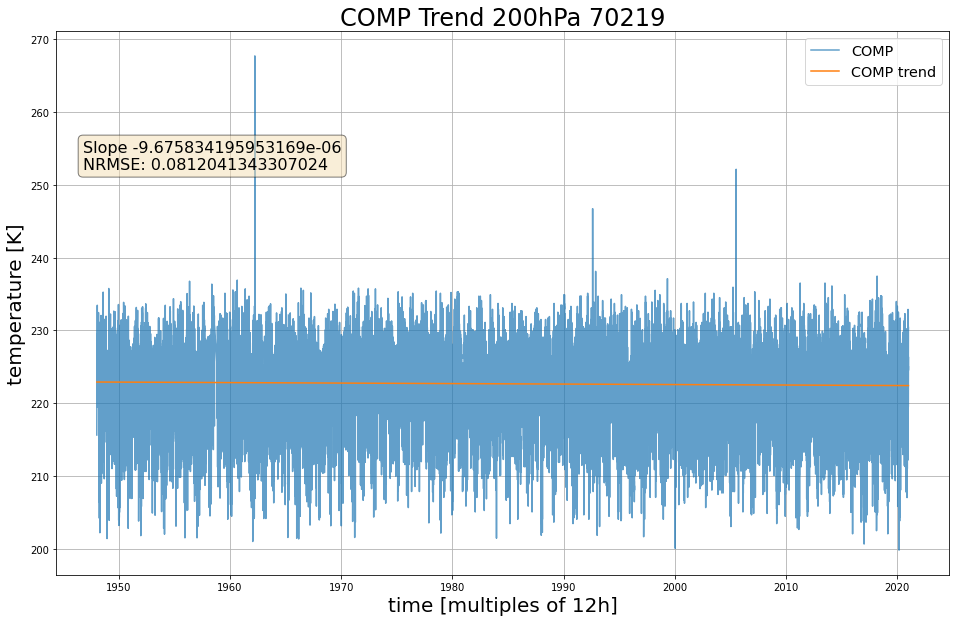

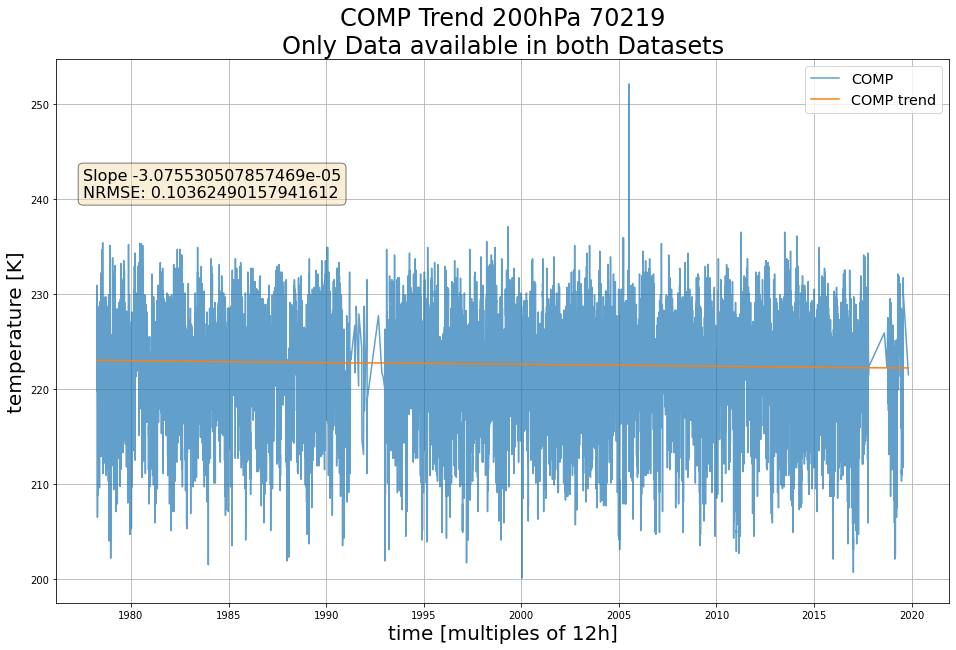

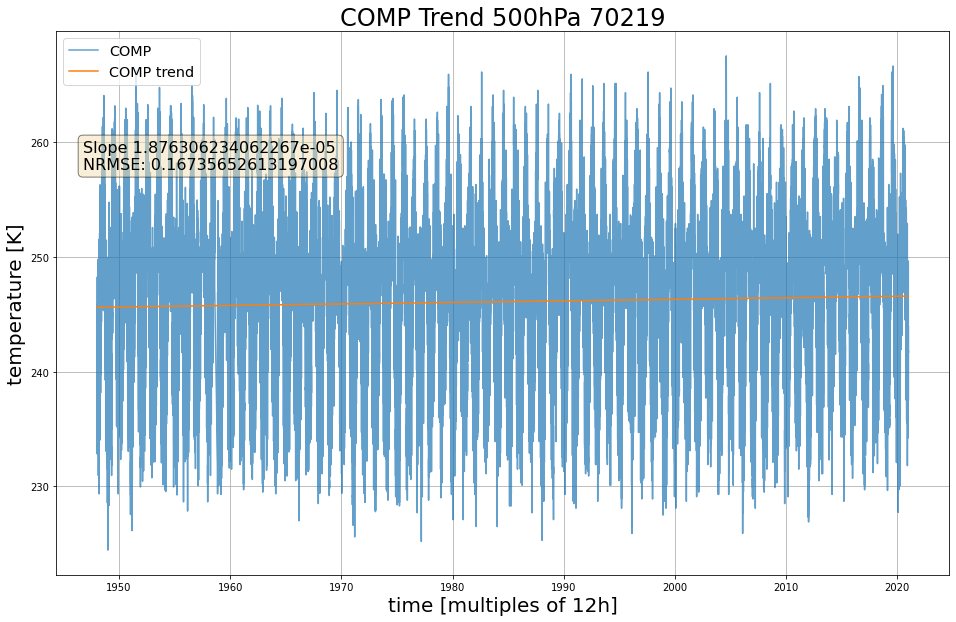

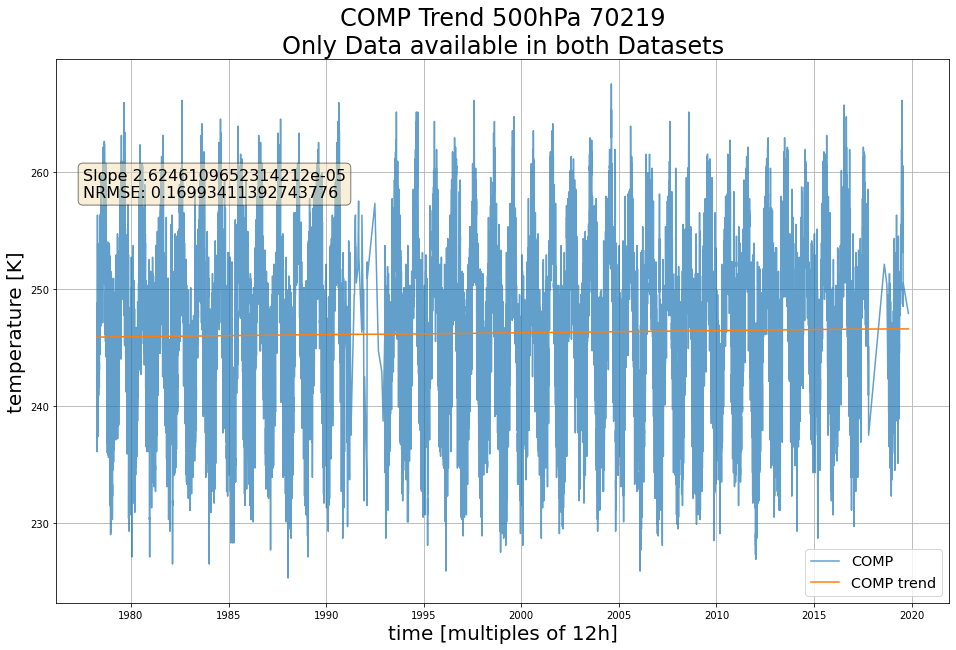

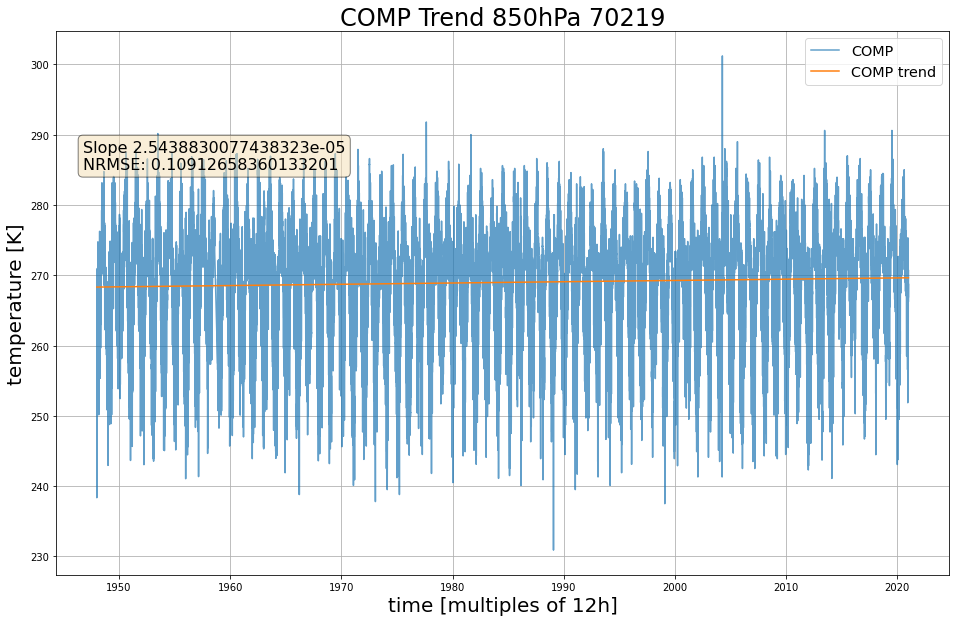

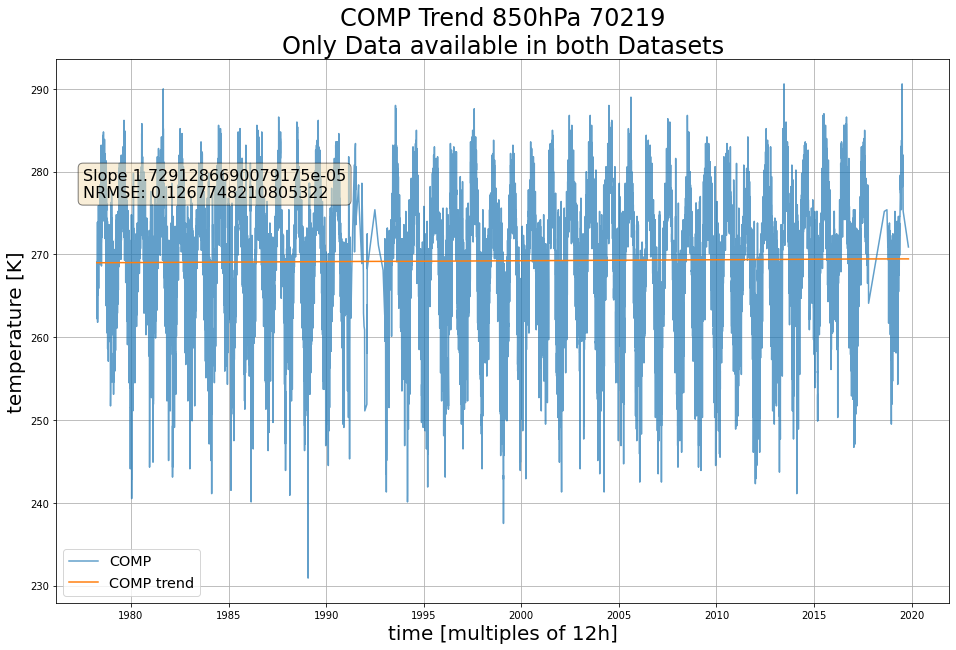

In [21]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_original[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

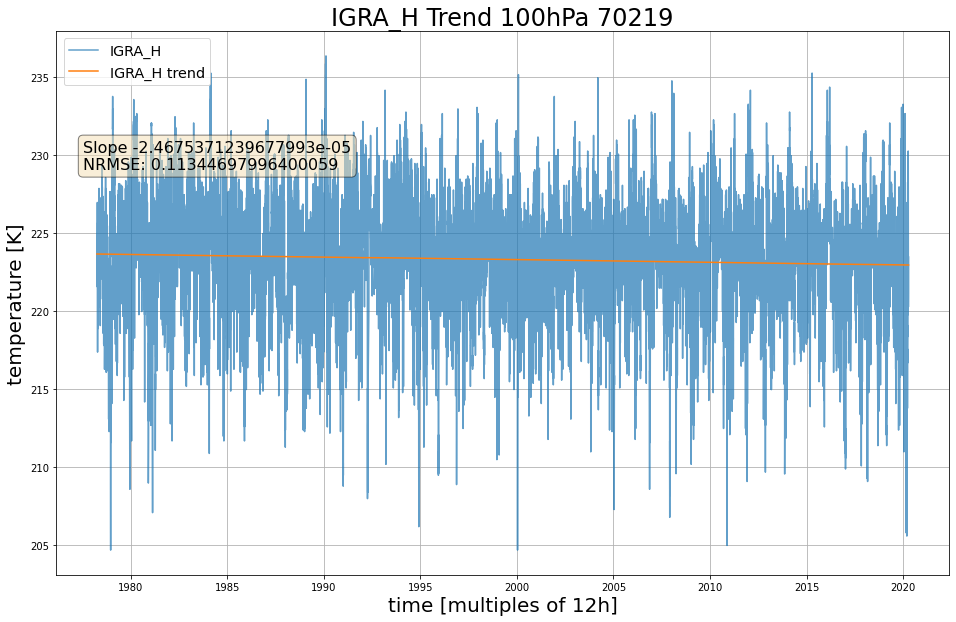

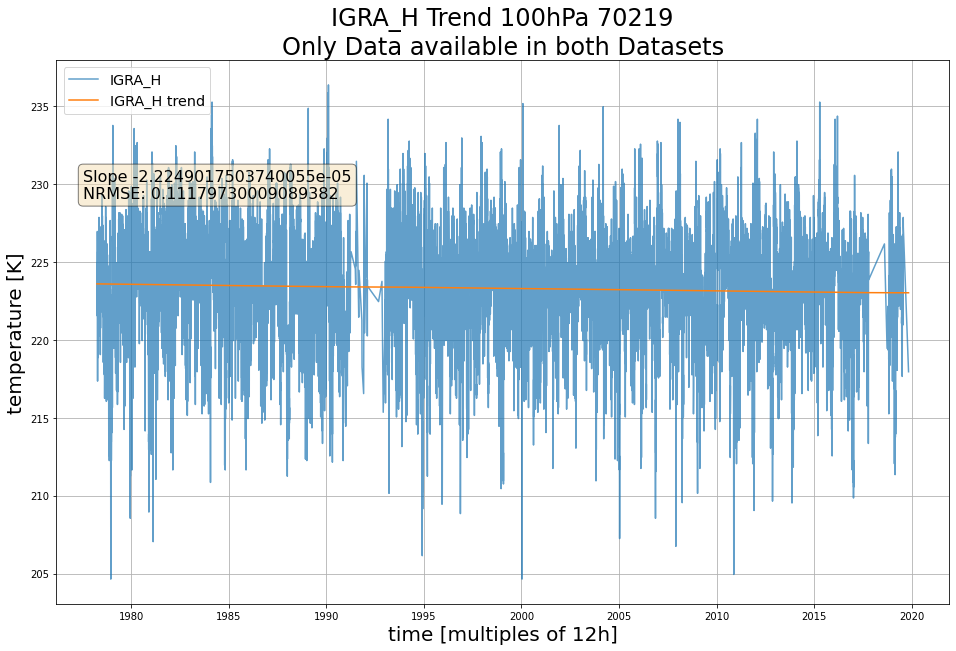

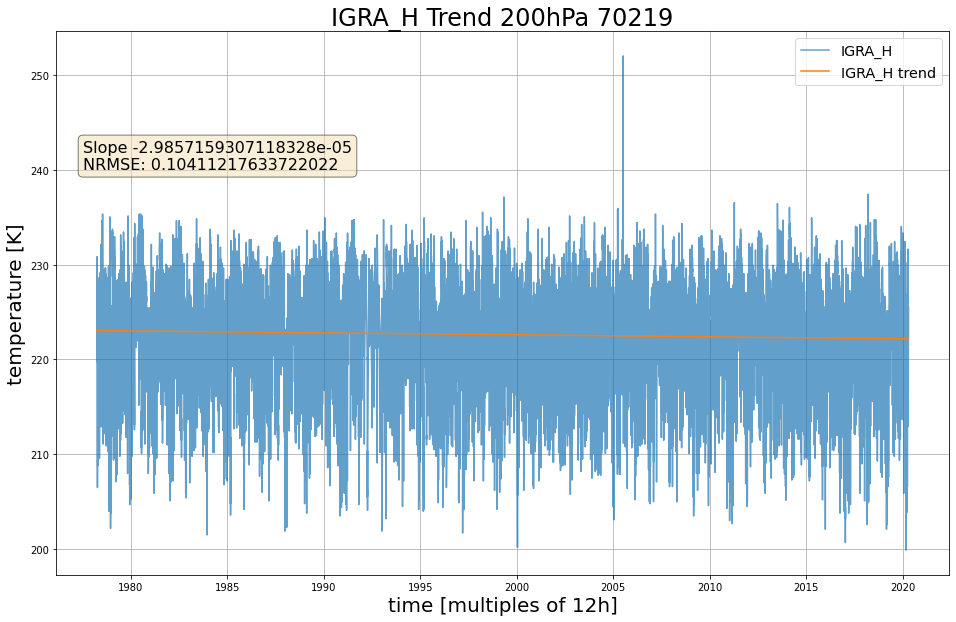

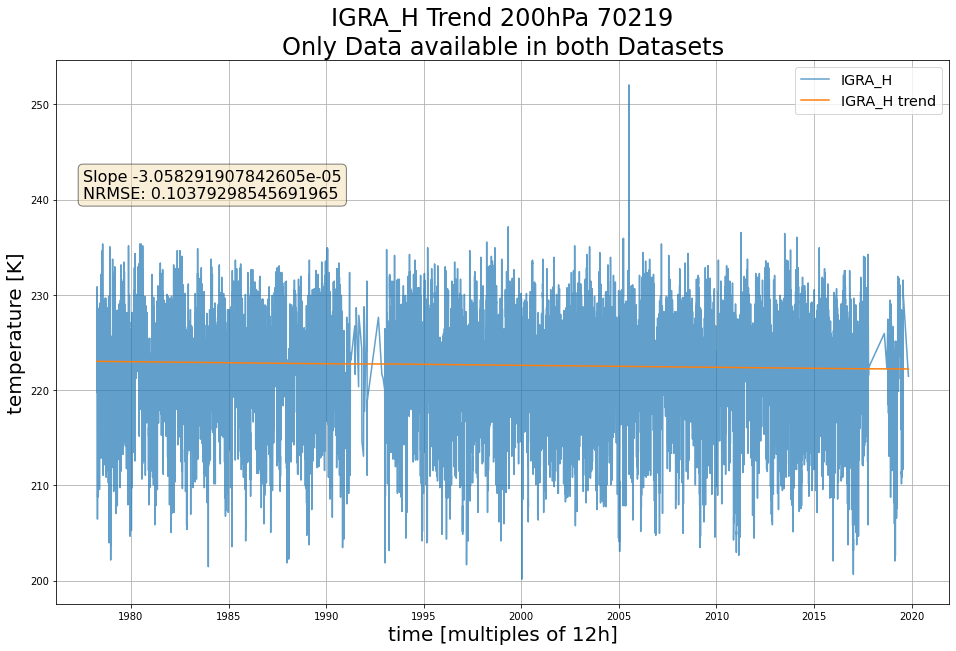

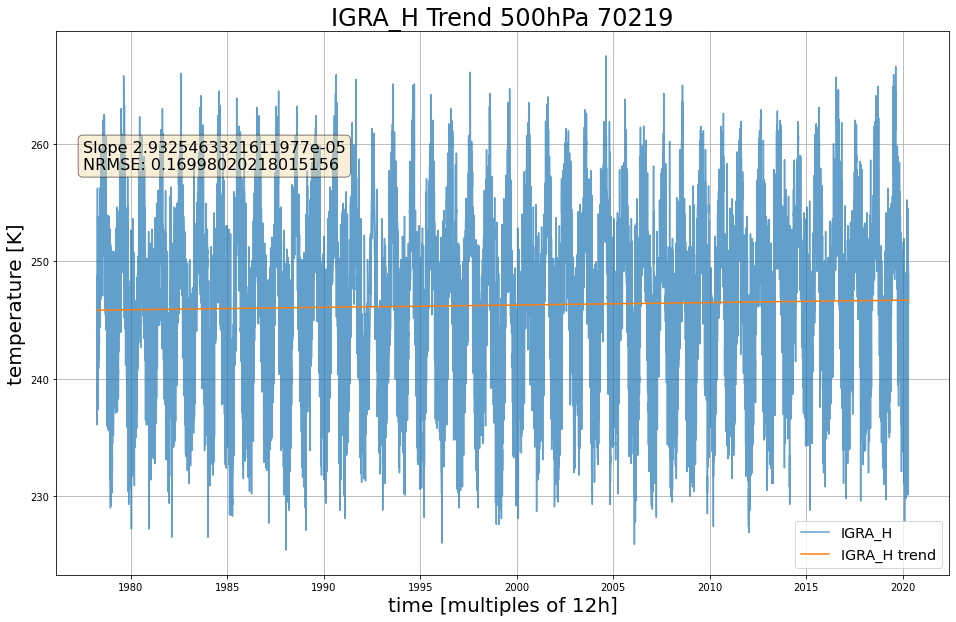

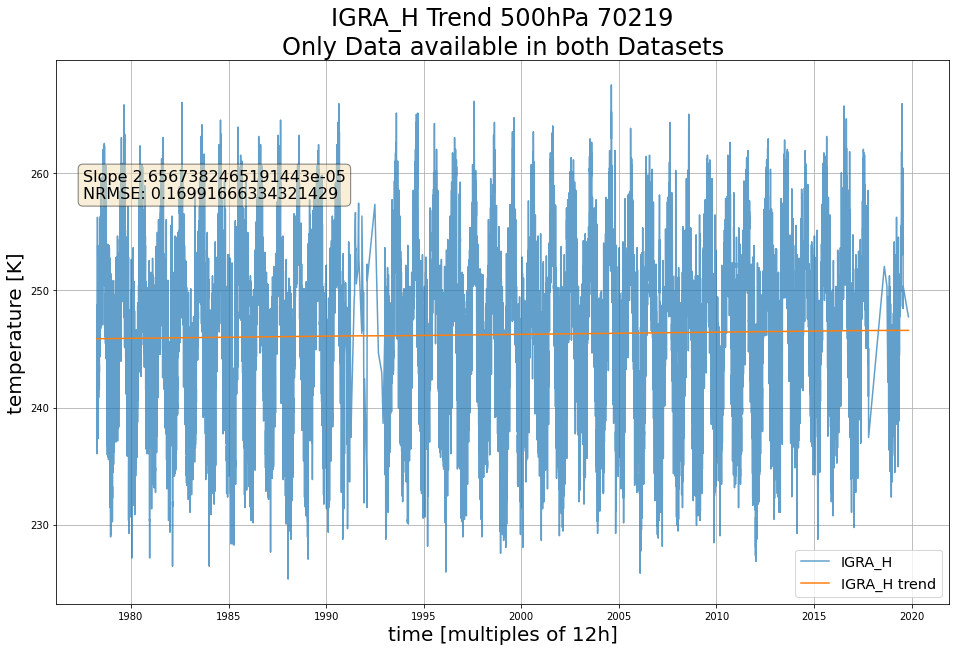

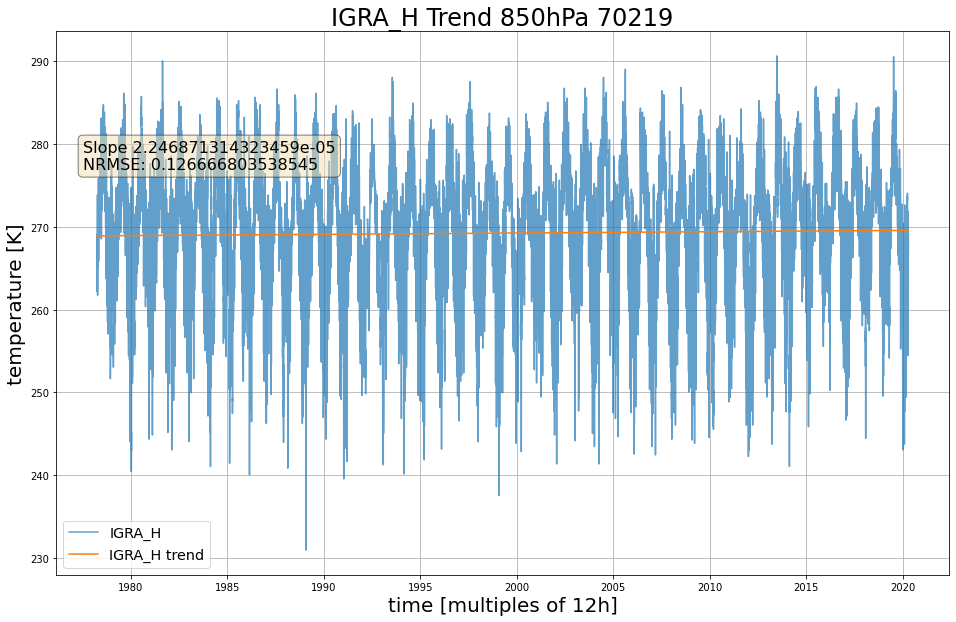

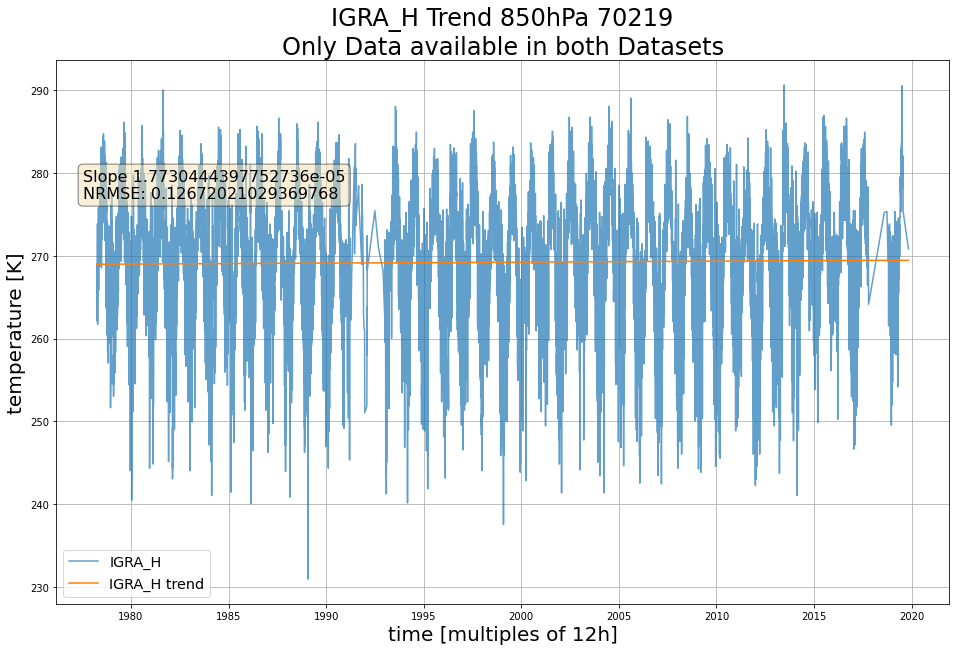

In [23]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = igrah_original[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = igra_h_adjusted[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [24]:
# reduced data
#
comp_ma = []
igra_h_ma = []
igra_ma = []

for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

In [25]:
# original data
#
comp_o_ma = []
igrah_o_ma = []
igra_o_ma = []

for i in range(len(comp_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_original[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_o_ma.append(comp_original[i])
    comp_o_ma[i].ta = comp_o_ma[i].ta - rm

    
for i in range(len(igra_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(igra_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_o_ma.append(igra_original[i])
    igra_o_ma[i].air_temperature = igra_o_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igrah_o_ma.append(igrah_original[i])
    igrah_o_ma[i].air_temperature = igrah_o_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

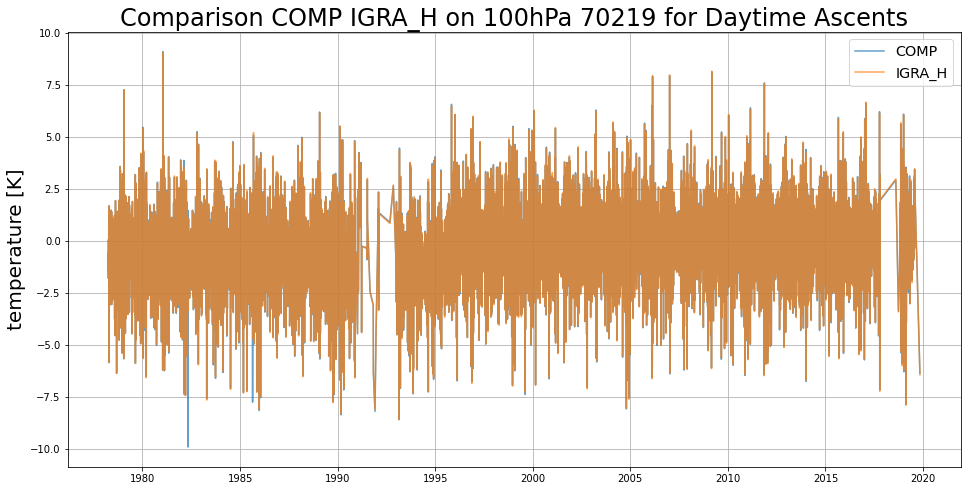

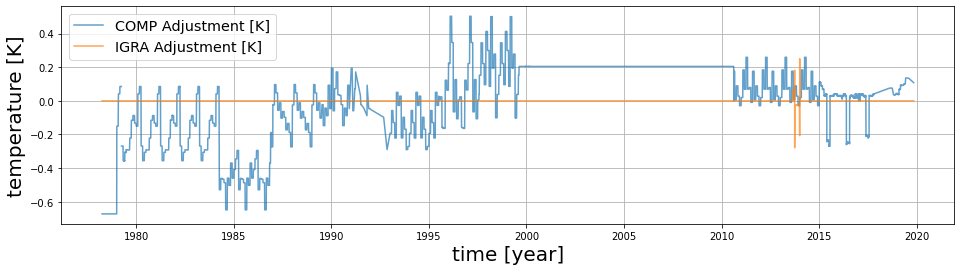

COMP Adjustment MEAN: -0.0037664557
COMP Adjustment MIN: -0.67284113
COMP Adjustment MAX: 0.50348127
IGRA Adjustment MEAN: -0.0001388103892002916
IGRA Adjustment MIN: -0.2792848859514834
IGRA Adjustment MAX: 0.2507128034319237


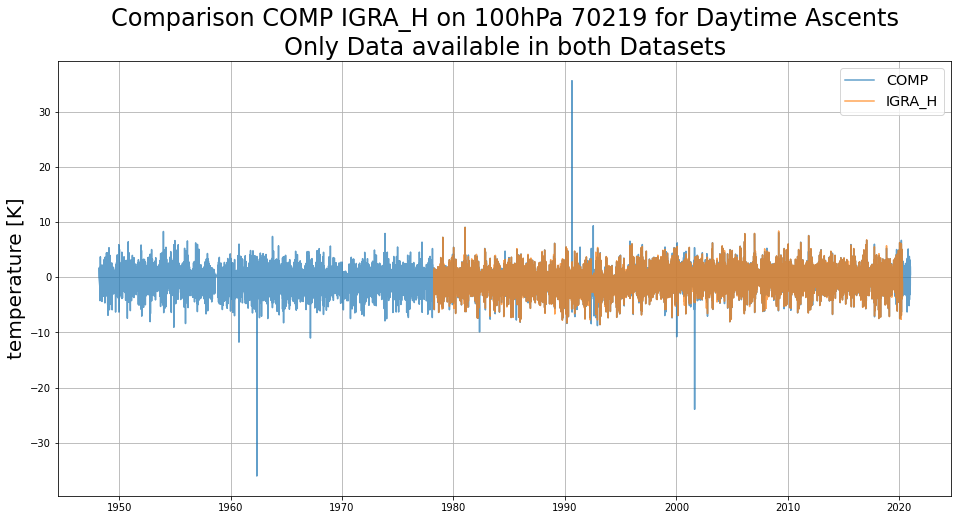

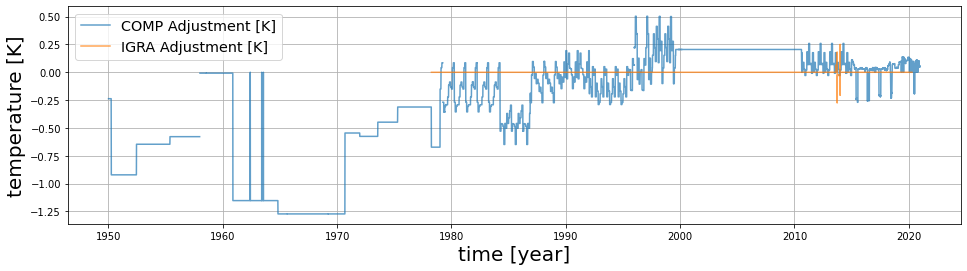

COMP Adjustment MEAN: -0.28919852
COMP Adjustment MIN: -1.272586
COMP Adjustment MAX: 0.50348127
IGRA Adjustment MEAN: -0.0001274143971086703
IGRA Adjustment MIN: -0.2757143293108584
IGRA Adjustment MAX: 0.2507128034319237


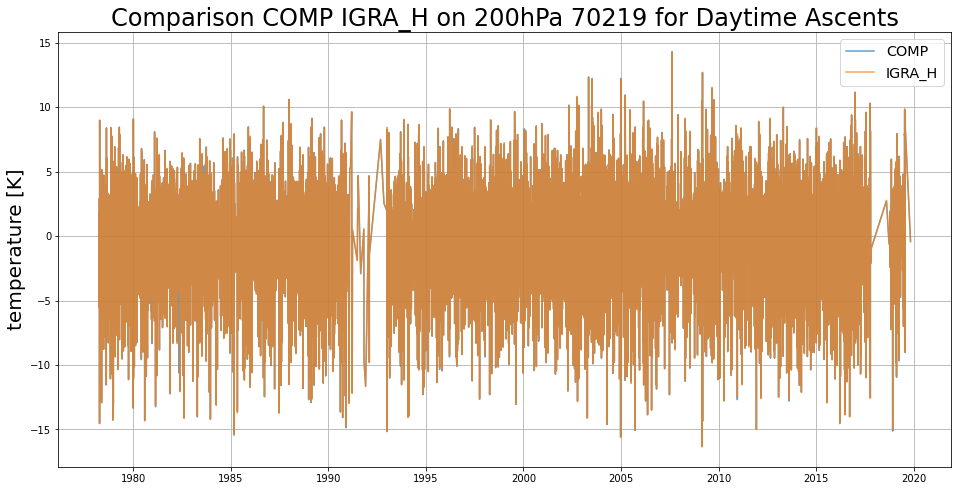

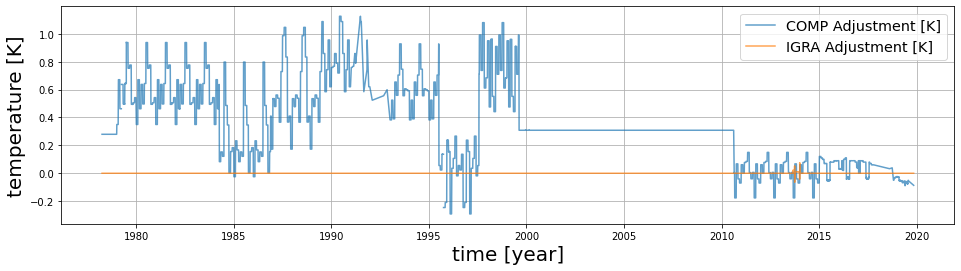

COMP Adjustment MEAN: 0.3527746
COMP Adjustment MIN: -0.29175627
COMP Adjustment MAX: 1.1263539
IGRA Adjustment MEAN: 8.390779845343395e-05
IGRA Adjustment MIN: -0.06428527832034092
IGRA Adjustment MAX: 0.07571084158760755


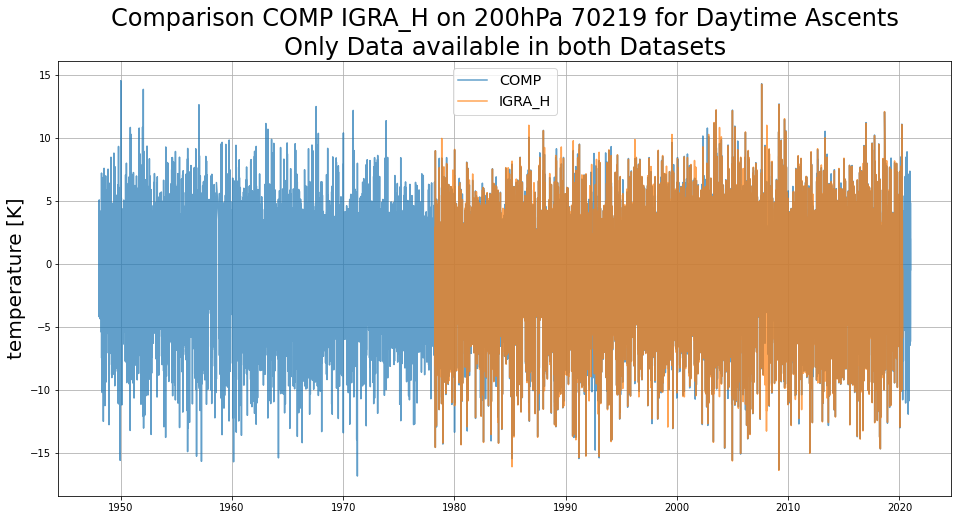

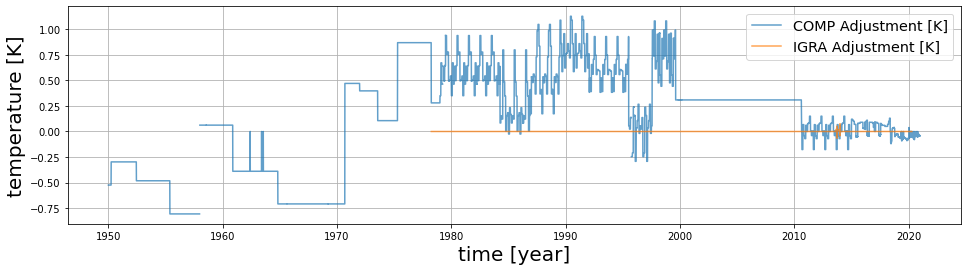

COMP Adjustment MEAN: 0.12817152
COMP Adjustment MIN: -0.80552477
COMP Adjustment MAX: 1.1263539
IGRA Adjustment MEAN: 7.53053630027215e-05
IGRA Adjustment MIN: -0.06571415492470578
IGRA Adjustment MAX: 0.07571084158760755


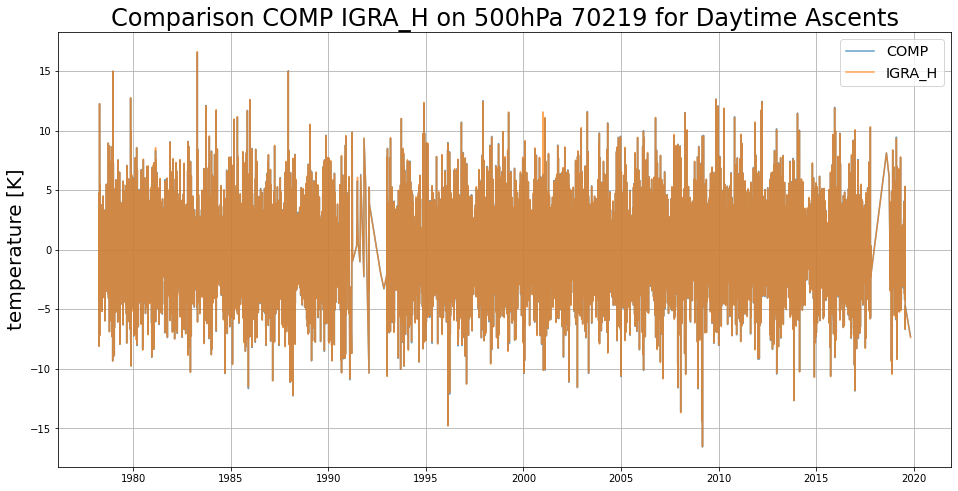

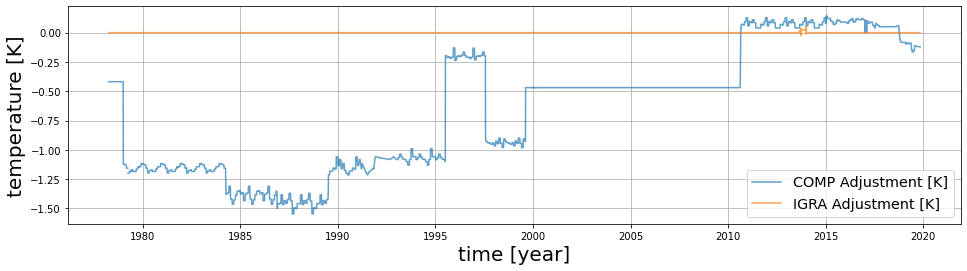

COMP Adjustment MEAN: -0.6711514
COMP Adjustment MIN: -1.5465966
COMP Adjustment MAX: 0.14
IGRA Adjustment MEAN: 0.00018242011787510898
IGRA Adjustment MIN: -0.02571650913782264
IGRA Adjustment MAX: 0.054284232003368516


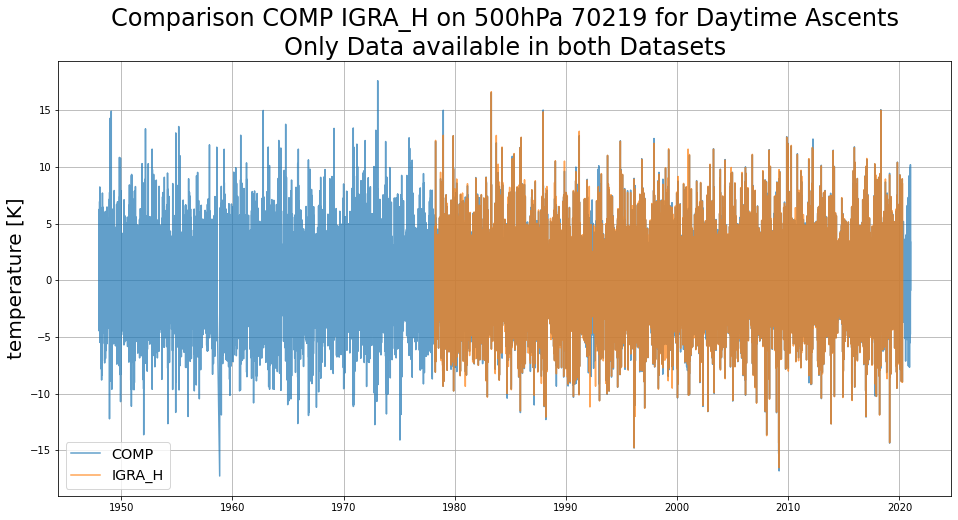

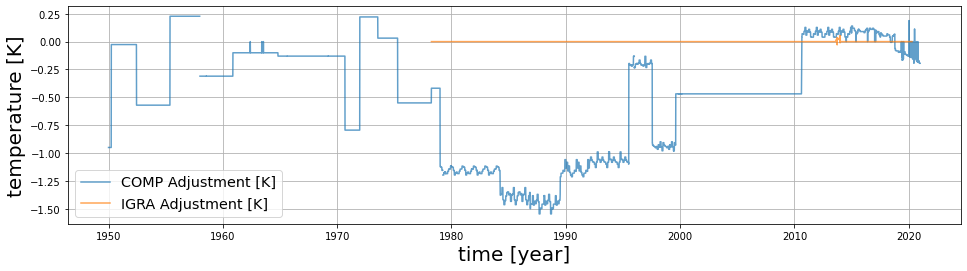

COMP Adjustment MEAN: -0.4718143
COMP Adjustment MIN: -1.5465966
COMP Adjustment MAX: 0.22763568
IGRA Adjustment MEAN: 0.00016785031520565068
IGRA Adjustment MIN: -0.029288155691943984
IGRA Adjustment MAX: 0.054284232003368516


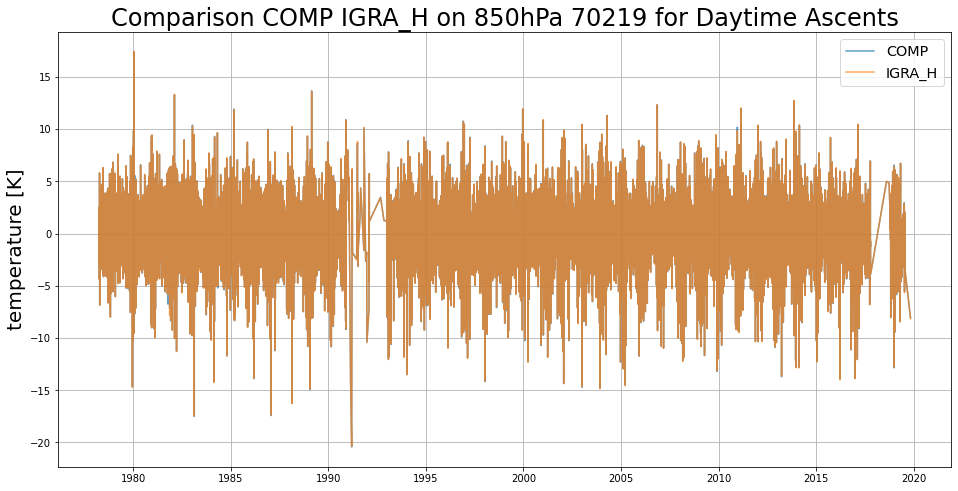

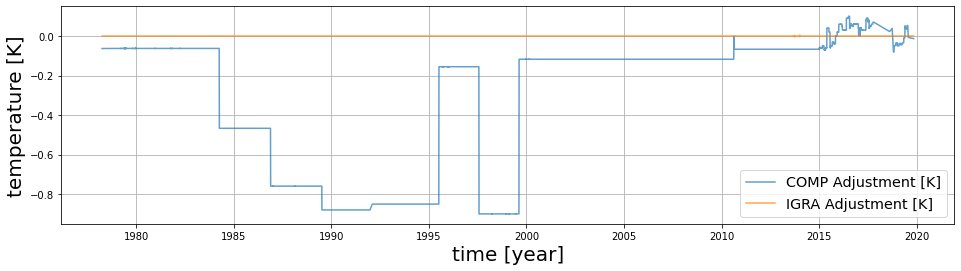

COMP Adjustment MEAN: -0.28457883
COMP Adjustment MIN: -0.9004905
COMP Adjustment MAX: 0.1
IGRA Adjustment MEAN: 7.986106759381601e-07
IGRA Adjustment MIN: -0.005009242466485375
IGRA Adjustment MAX: 0.004996163504472406


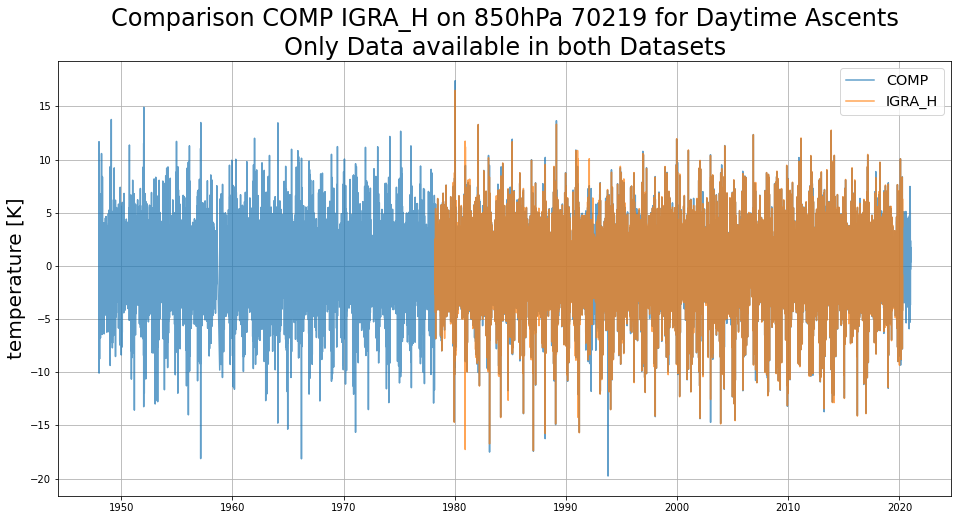

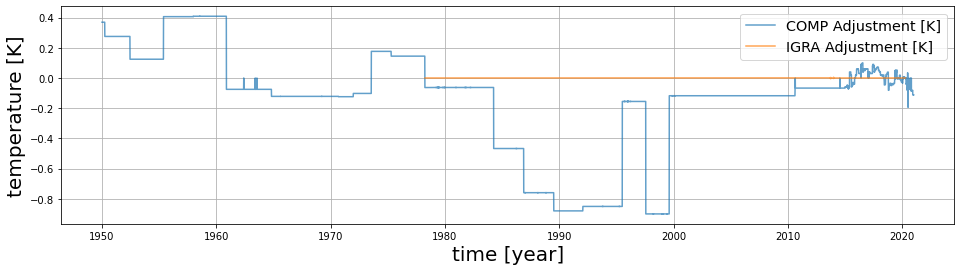

COMP Adjustment MEAN: -0.1395058
COMP Adjustment MIN: -0.9004905
COMP Adjustment MAX: 0.409036
IGRA Adjustment MEAN: 6.808533282959703e-07
IGRA Adjustment MIN: -0.005009242466485375
IGRA Adjustment MAX: 0.004996163504472406


In [39]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6][a.report_timestamp.dt.hour < 18]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6][b.report_timestamp.dt.hour < 18]
    c = comp_ma[i]
    c = c[c.time.dt.hour >= 6][c.time.dt.hour < 18]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6]
    a = a[a.report_timestamp.dt.hour < 18]
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6]
    b = b[b.report_timestamp.dt.hour < 18]
    c = comp_o_ma[i]
    c = c[c.time.dt.hour >= 6]
    c = c[c.time.dt.hour < 18]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

In [27]:
a = igra_o_ma[0]
a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour > 18])

station_name    report_timestamp  report_id   longitude  latitude  \
9        USM00070219 1978-04-01 00:00:00   32058993 -161.839996    60.785   
179      USM00070219 1978-04-03 00:00:00   32059049 -161.839996    60.785   
282      USM00070219 1978-04-04 00:00:00   32059073 -161.839996    60.785   
353      USM00070219 1978-04-05 00:00:00   32059103 -161.839996    60.785   
449      USM00070219 1978-04-06 00:00:00   32059118 -161.839996    60.785   
...              ...                 ...        ...         ...       ...   
1838757  USM00070219 2003-08-28 23:00:00   32061077 -161.839996    60.785   
2413483  USM00070219 2007-10-25 23:00:00   32016714 -161.839996    60.785   
2499834  USM00070219 2008-06-22 23:00:00   32027398 -161.839996    60.785   
2731995  USM00070219 2010-05-04 23:00:00   32048259 -161.839996    60.785   
2748977  USM00070219 2010-06-19 23:00:00   32051269 -161.839996    60.785   

         air_pressure  air_temperature             actual_time  \
9             10000.0        -0.092856  1978-04-01 00:00:00+00   
179           10000.0        -0.692862  1978-04-03 00:00:00+00   
282           10000.0         0.107141  1978-04-04 00:00:00+00   
353           10000.0         1.607141  1978-04-05 00:00:00+00   
449           10000.0         0.564286  1978-04-06 00:00:00+00   
...               ...              ...                     ...   
1838757       10000.0        -0.964292  2003-08-28 22:59:00+00   
2413483       10000.0        -1.421423  2007-10-25 22:59:00+00   
2499834       10000.0         0.085711  2008-06-22 22:59:00+00   
2731995       10000.0        -3.764281  2010-05-04 22:59:00+00   
2748977       10000.0         0.878577  2010-06-19 22:59:00+00   

         height_of_station_above_sea_level  
9                                     33.5  
179                                   33.5  
282                                   33.5  
353                                   33.5  
449                                   33.5  
...                                    ...  
1838757                               33.5  
2413483                               33.5  
2499834                               33.5  
2731995                               33.5  
2748977                               33.5  

[14330 rows x 9 columns]

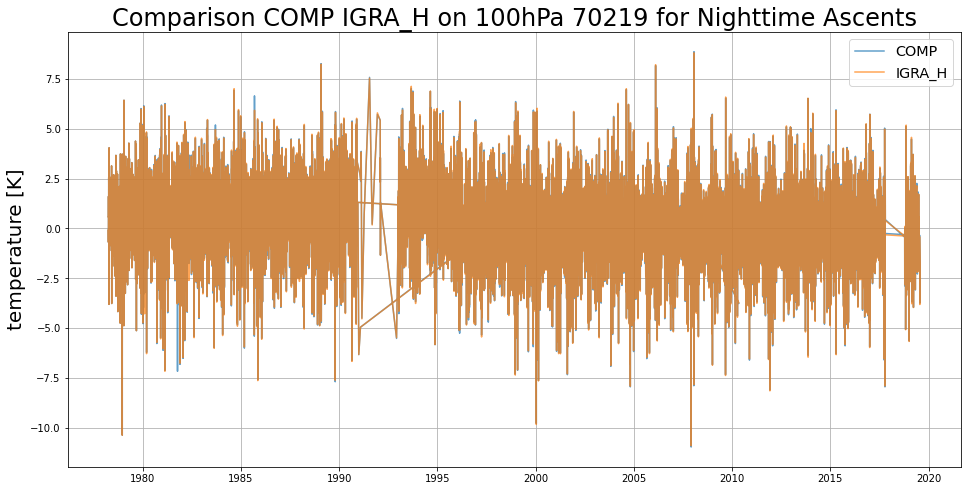

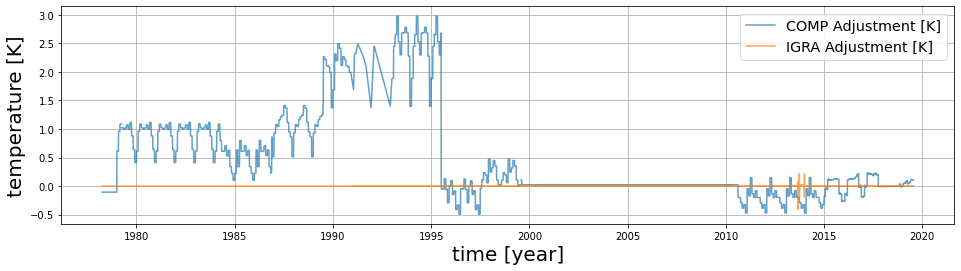

COMP Adjustment MEAN: 0.46803996
COMP Adjustment MIN: -0.48789382
COMP Adjustment MAX: 2.9765775
IGRA Adjustment MEAN: 0.00013636420209734286
IGRA Adjustment MIN: -0.4114249093192086
IGRA Adjustment MAX: 0.21642739432198255


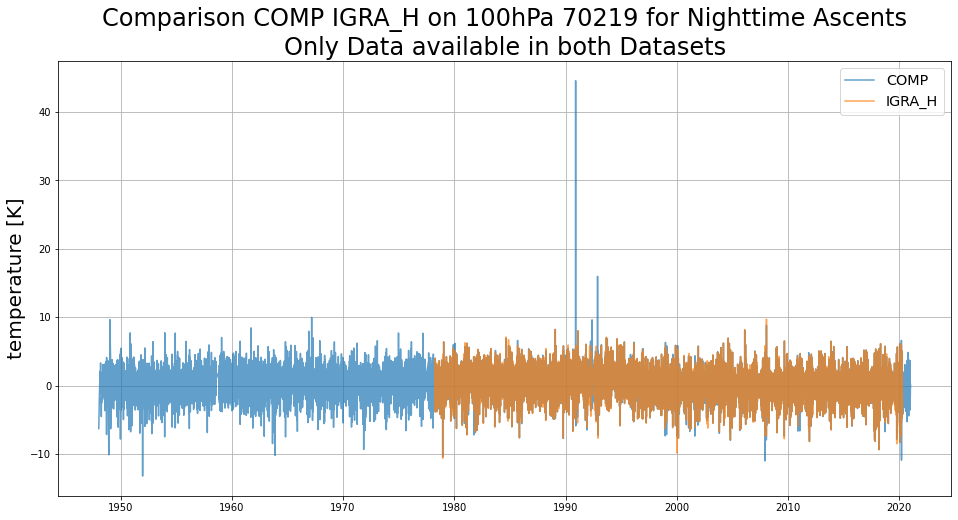

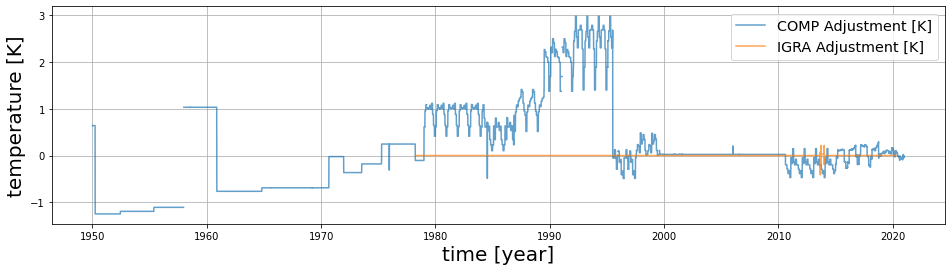

COMP Adjustment MEAN: 0.1397699
COMP Adjustment MIN: -1.2483448
COMP Adjustment MAX: 2.9765775
IGRA Adjustment MEAN: 0.00012650746978798864
IGRA Adjustment MIN: -0.4114249093192086
IGRA Adjustment MAX: 0.21642739432198255


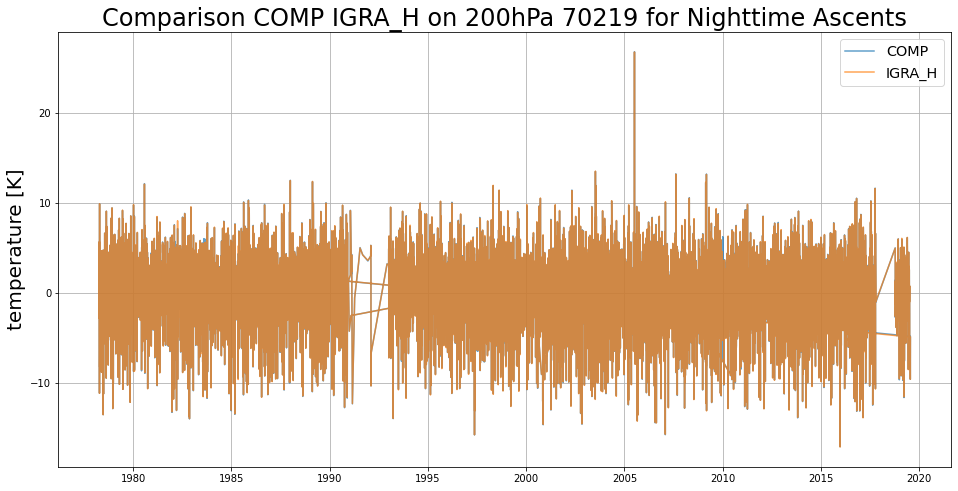

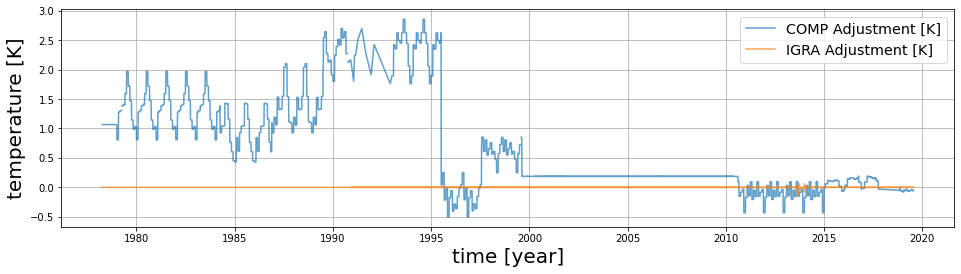

COMP Adjustment MEAN: 0.69338554
COMP Adjustment MIN: -0.5023657
COMP Adjustment MAX: 2.8555012
IGRA Adjustment MEAN: -8.305636508233539e-05
IGRA Adjustment MIN: -0.13714599609375
IGRA Adjustment MAX: 0.06428527832028408


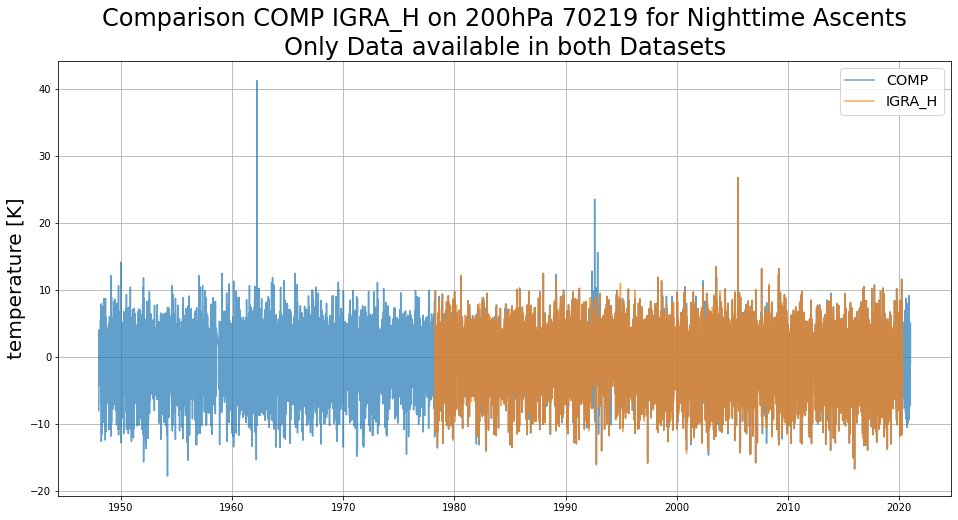

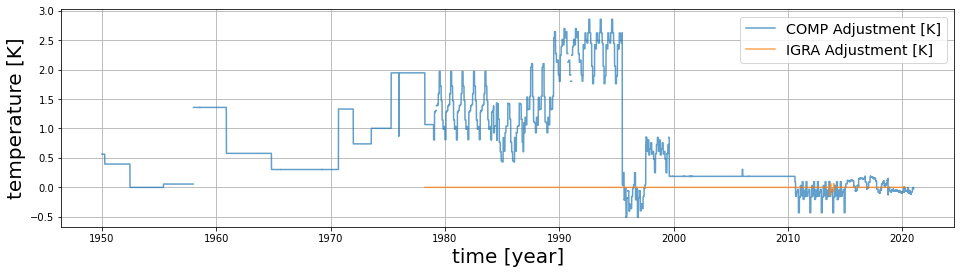

COMP Adjustment MEAN: 0.70848155
COMP Adjustment MIN: -0.5023657
COMP Adjustment MAX: 2.8555012
IGRA Adjustment MEAN: -7.494247057460138e-05
IGRA Adjustment MIN: -0.13714599609375
IGRA Adjustment MAX: 0.06428527832028408


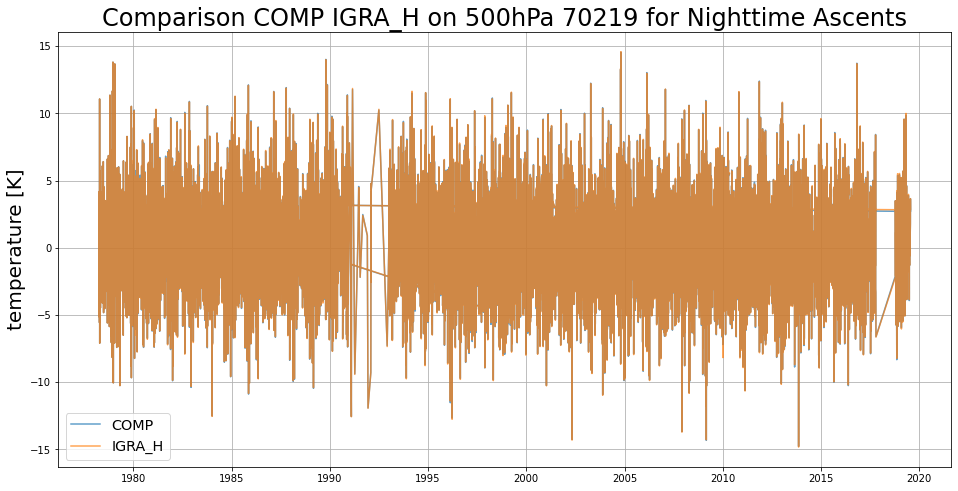

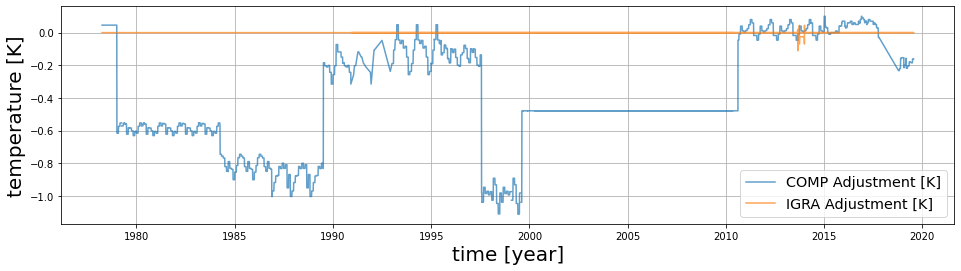

COMP Adjustment MEAN: -0.4120178
COMP Adjustment MIN: -1.1104542
COMP Adjustment MAX: 0.10022519
IGRA Adjustment MEAN: -0.0001825153835290552
IGRA Adjustment MIN: -0.11143384660994116
IGRA Adjustment MAX: 0.044999258858837266


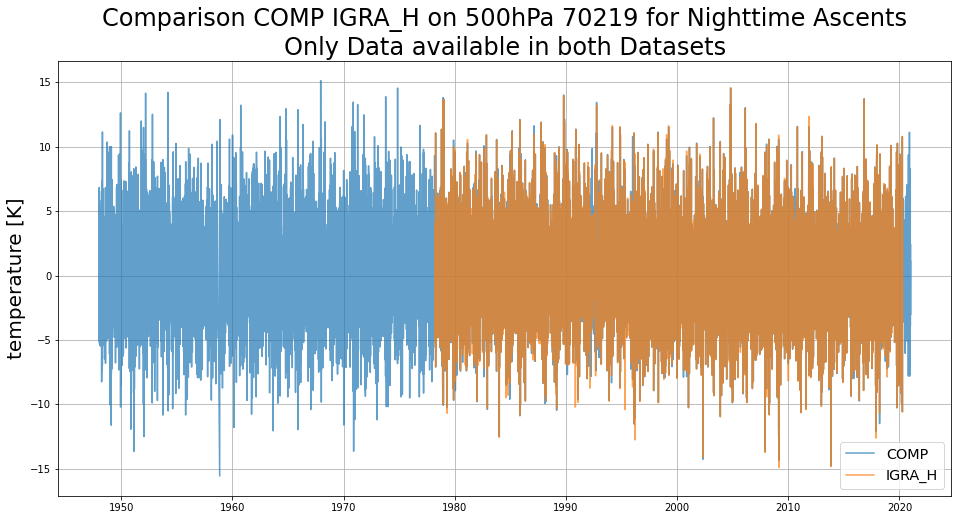

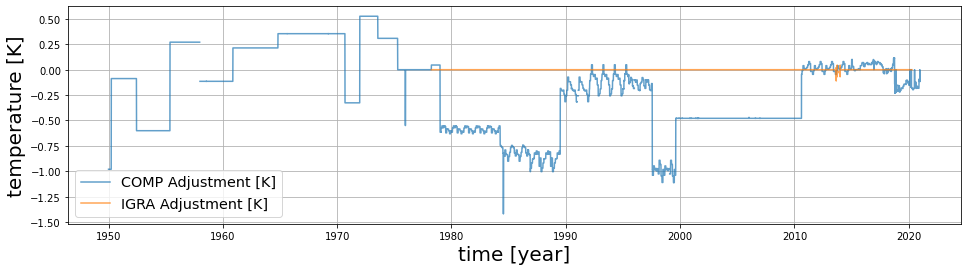

COMP Adjustment MEAN: -0.19806702
COMP Adjustment MIN: -1.4198124
COMP Adjustment MAX: 0.5259816
IGRA Adjustment MEAN: -0.00016738314645111518
IGRA Adjustment MIN: -0.11143384660994116
IGRA Adjustment MAX: 0.044999258858837266


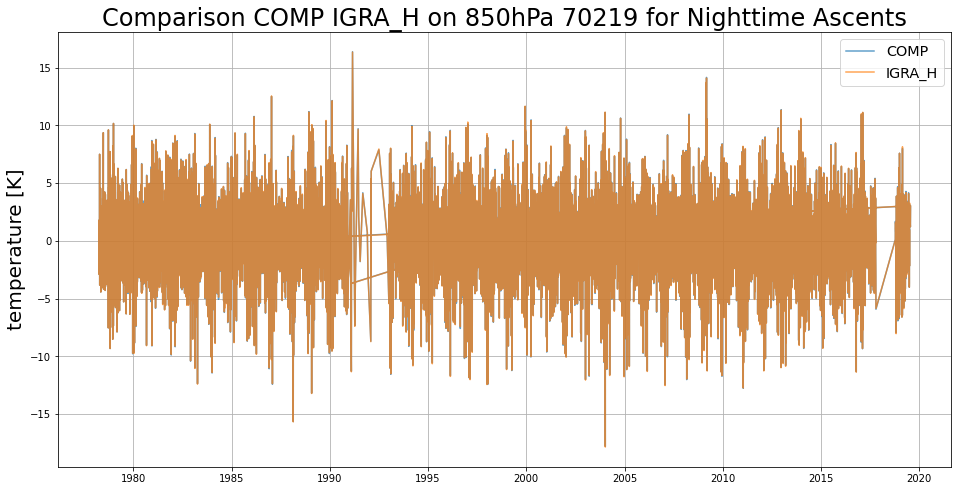

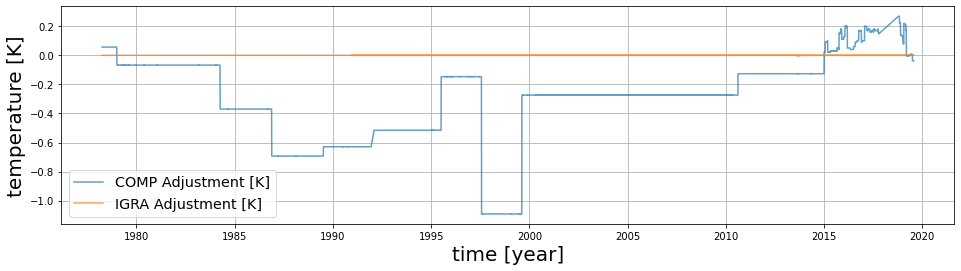

COMP Adjustment MEAN: -0.29382968
COMP Adjustment MIN: -1.0912249
COMP Adjustment MAX: 0.26875013
IGRA Adjustment MEAN: -7.99502513427905e-07
IGRA Adjustment MIN: -0.008553641183027594
IGRA Adjustment MAX: 0.004285539899569812


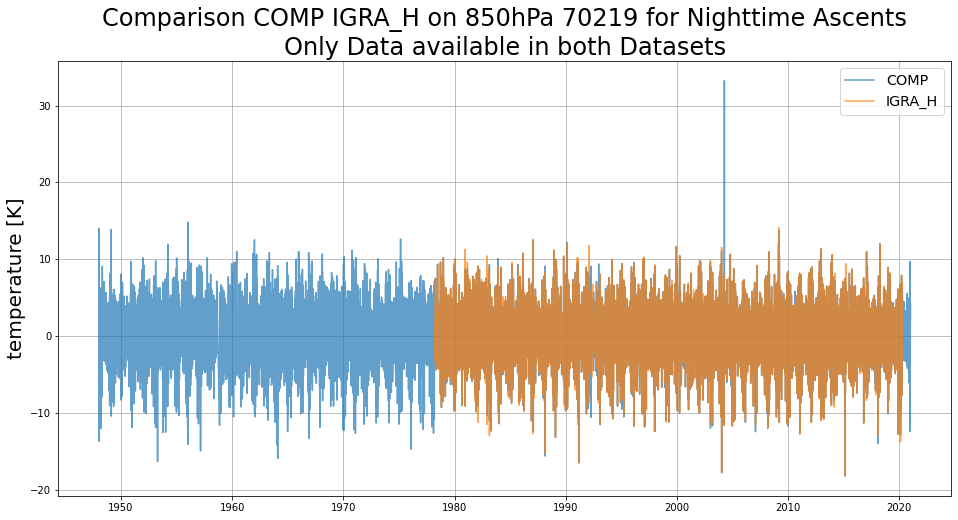

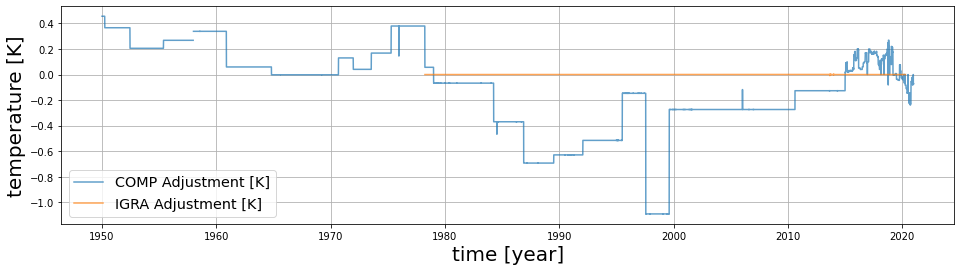

COMP Adjustment MEAN: -0.10150519
COMP Adjustment MIN: -1.0912249
COMP Adjustment MAX: 0.45633247
IGRA Adjustment MEAN: -6.794678844419085e-07
IGRA Adjustment MIN: -0.008553641183027594
IGRA Adjustment MAX: 0.004285539899569812


In [38]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18])
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18])
    c = comp_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >=18])
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    c = comp_o_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >= 18]).sort_values('time')
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

## Difference:

Finding the difference between the two data sets by subtracting them.

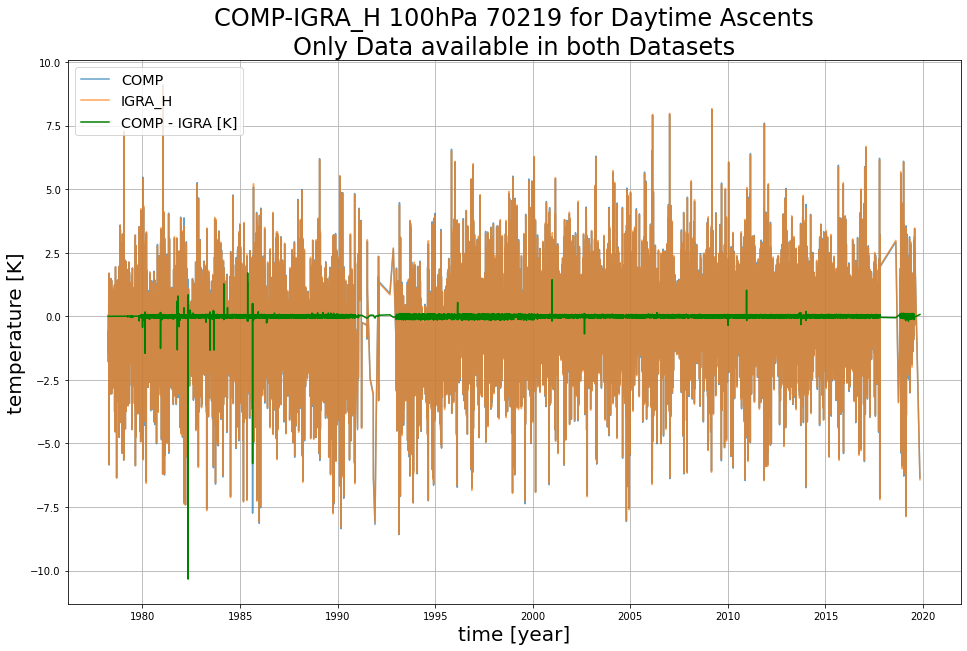

DIFF MEAN: -0.001237469124425089
DIFF MIN: -10.335708618164062
DIFF MAX: 1.7071337018693953


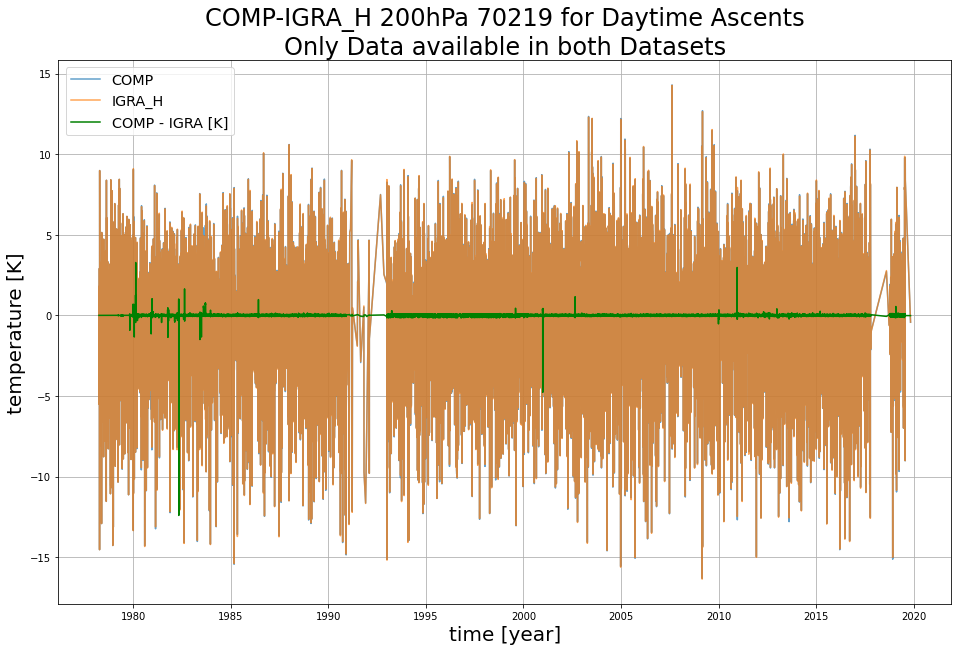

DIFF MEAN: 0.00036726798886793074
DIFF MIN: -12.414276123046903
DIFF MAX: 3.2785644531250284


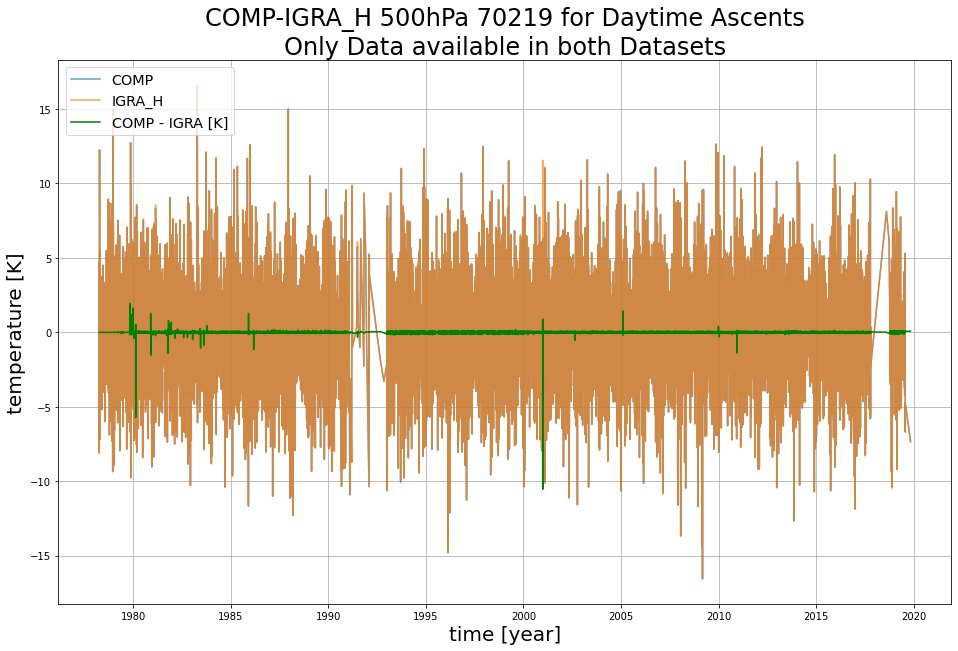

DIFF MEAN: -0.000649118009307443
DIFF MIN: -10.539290291922441
DIFF MAX: 1.9500100272042573


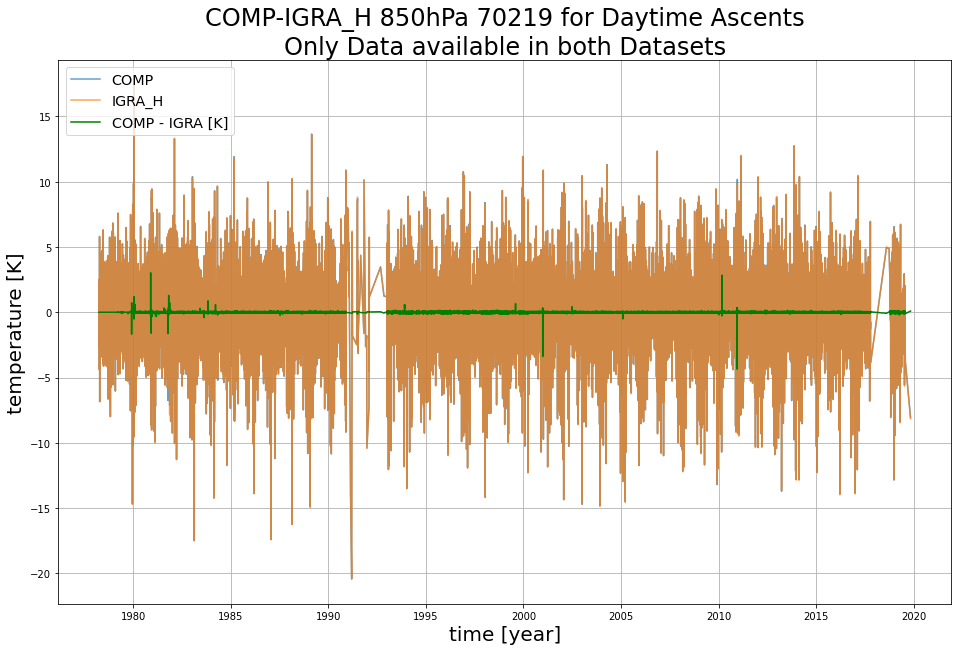

DIFF MEAN: -0.0005174918401141307
DIFF MIN: -4.35714067731584
DIFF MAX: 3.021429879324785


In [29]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

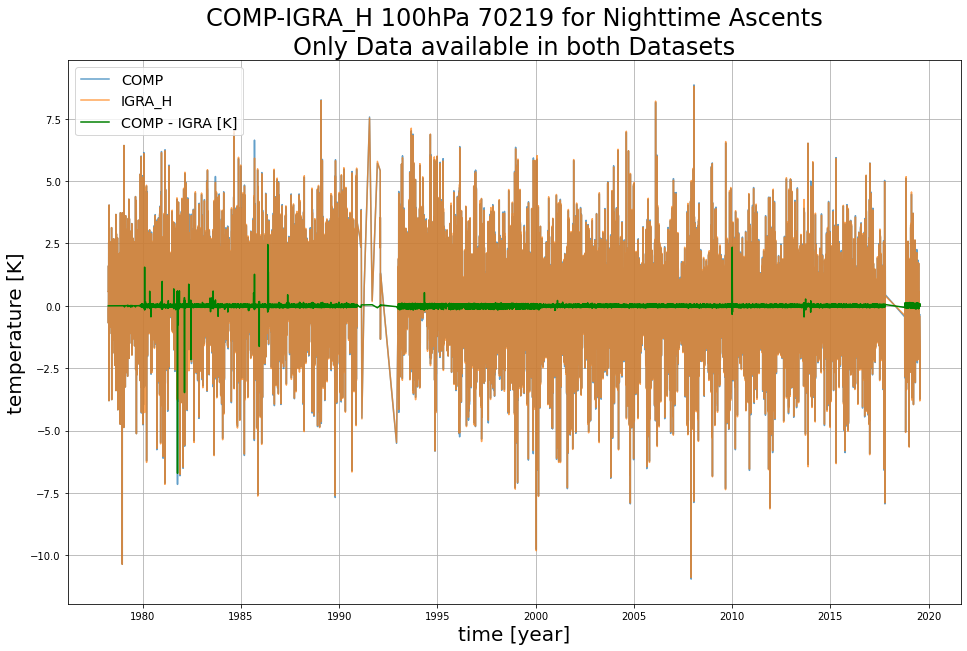

DIFF MEAN: 0.0012423807152512935
DIFF MIN: -6.717857360839844
DIFF MAX: 2.4571369716099696


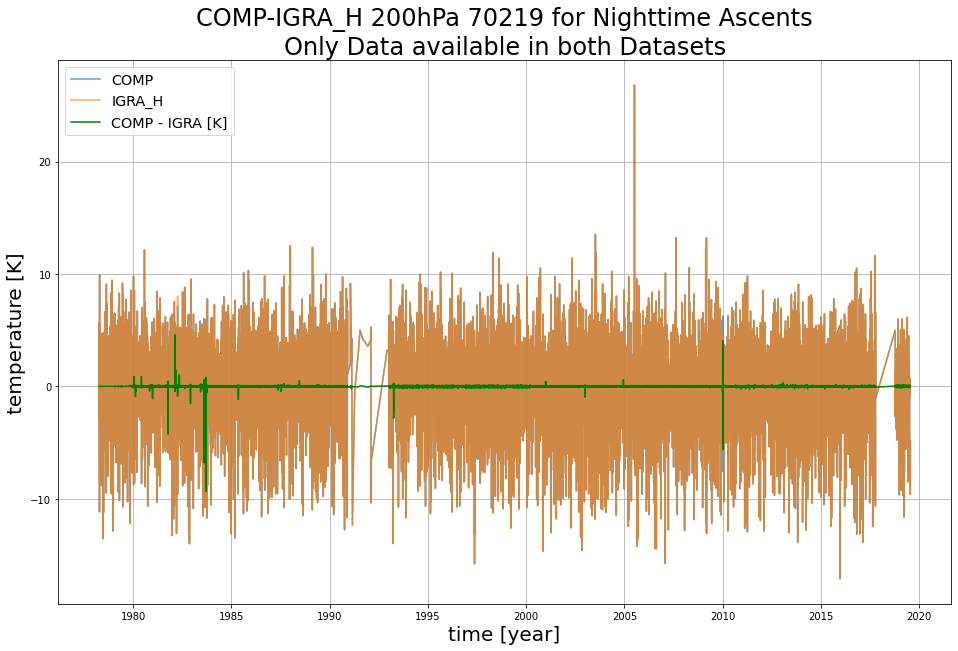

DIFF MEAN: -0.00037248561940874926
DIFF MIN: -9.335716247558565
DIFF MAX: 4.585711887904608


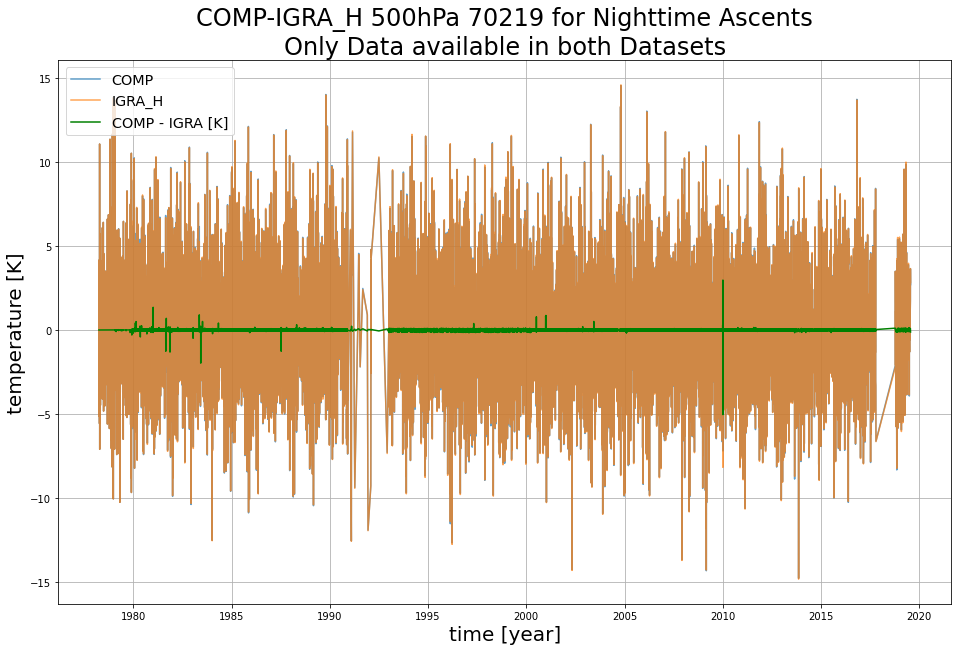

DIFF MEAN: 0.0006770507688769758
DIFF MIN: -5.035716465541327
DIFF MAX: 2.9714268275669156


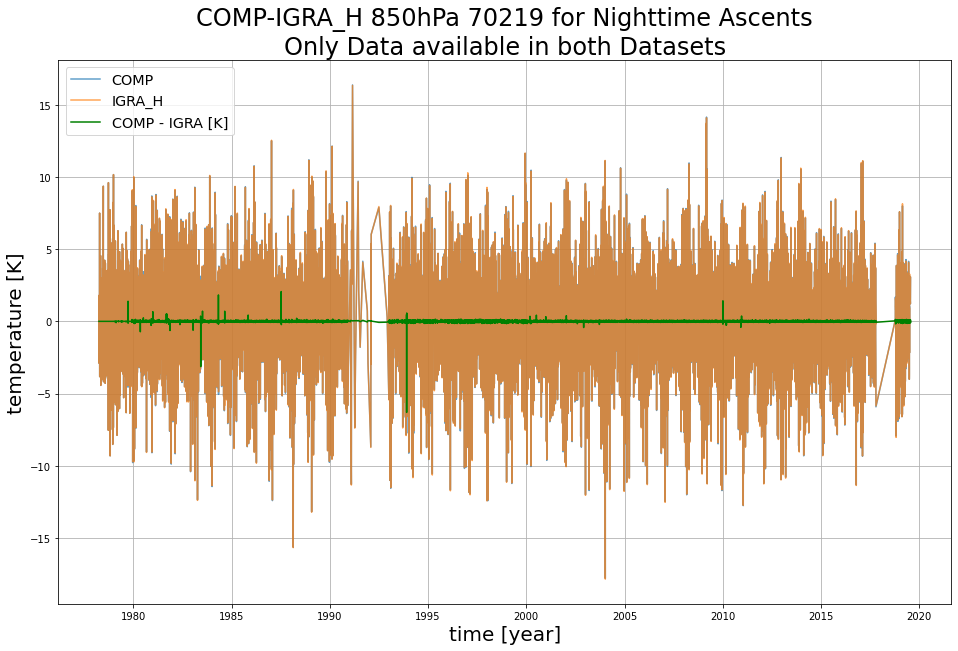

DIFF MEAN: 0.000508796122163372
DIFF MIN: -6.307120186941916
DIFF MAX: 2.06428309849332


In [30]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

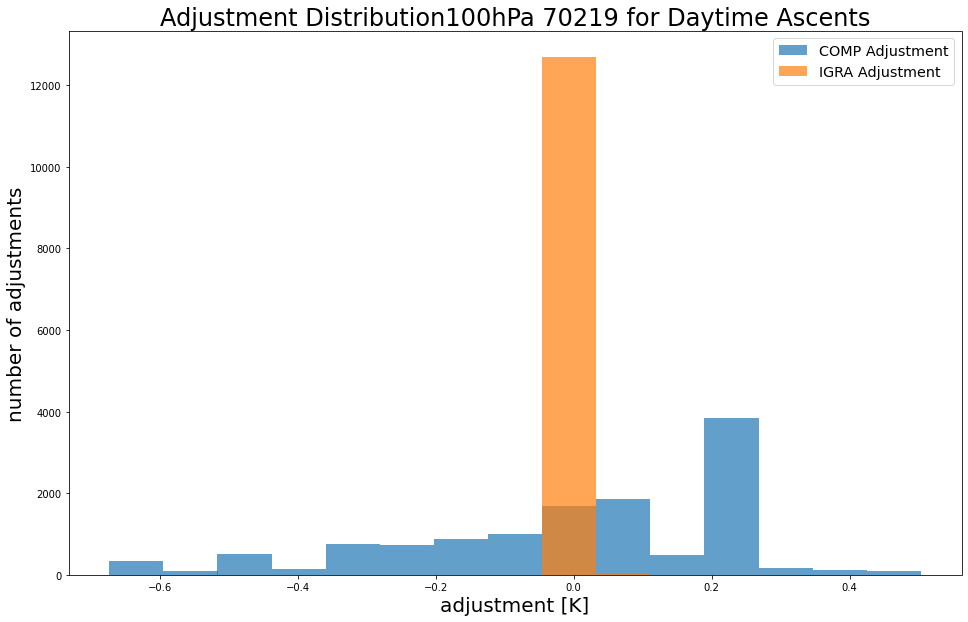

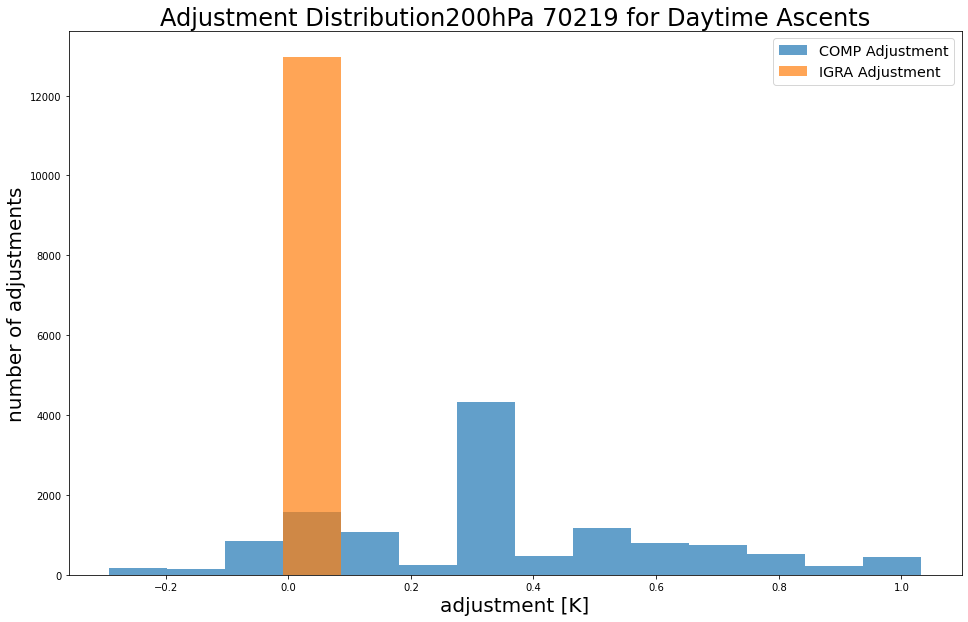

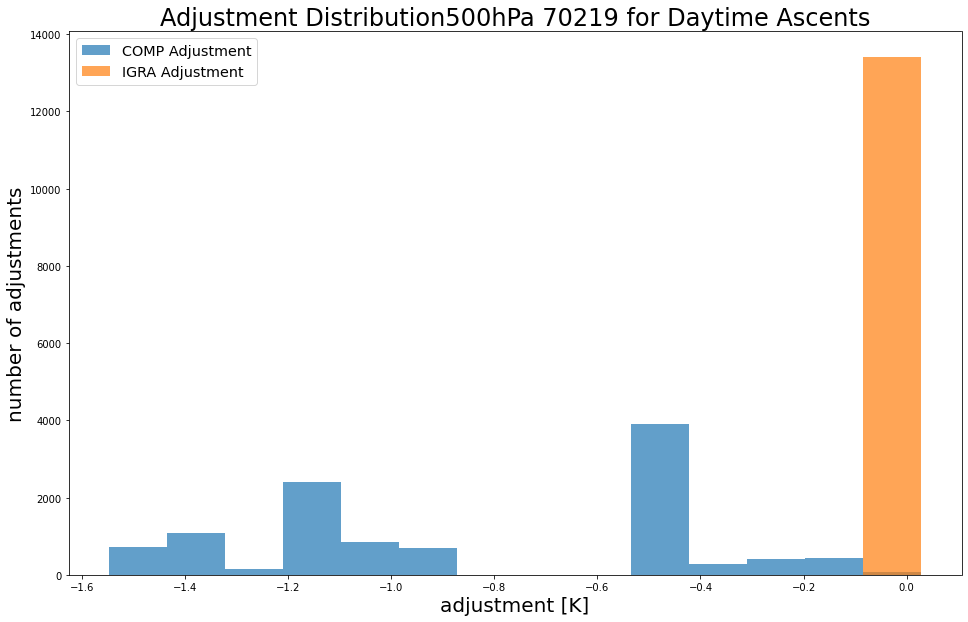

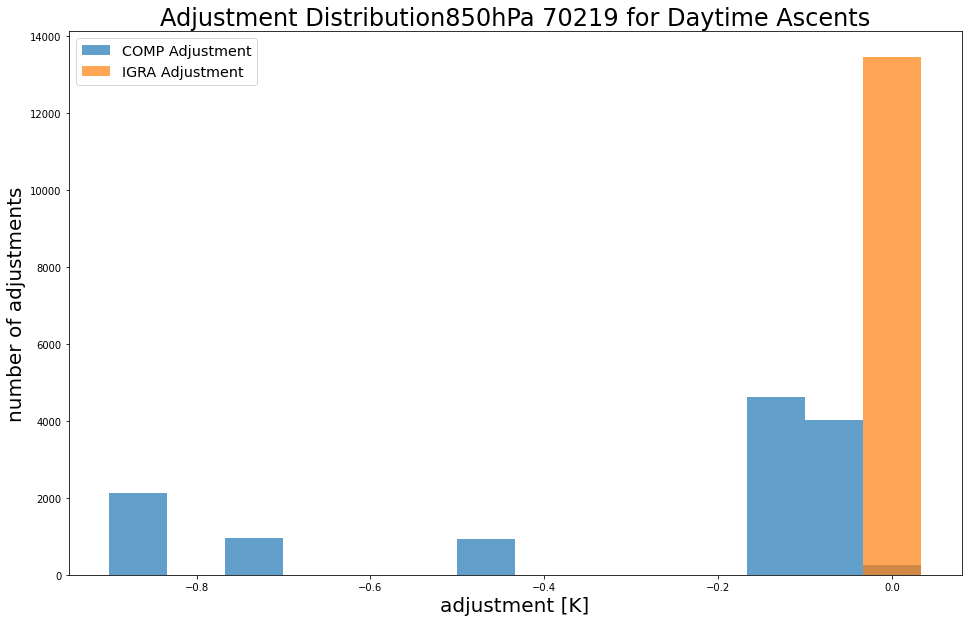

In [31]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

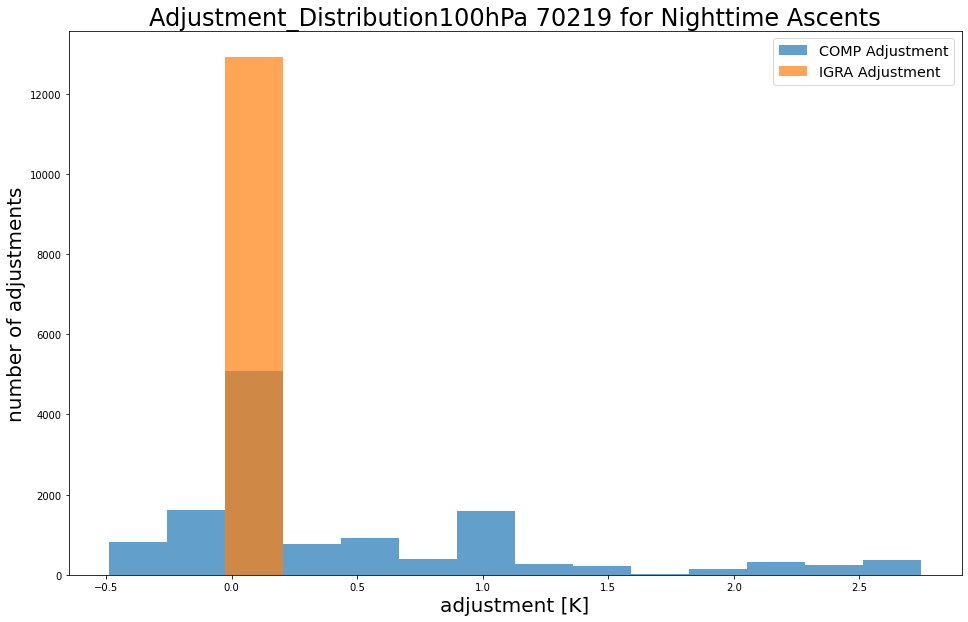

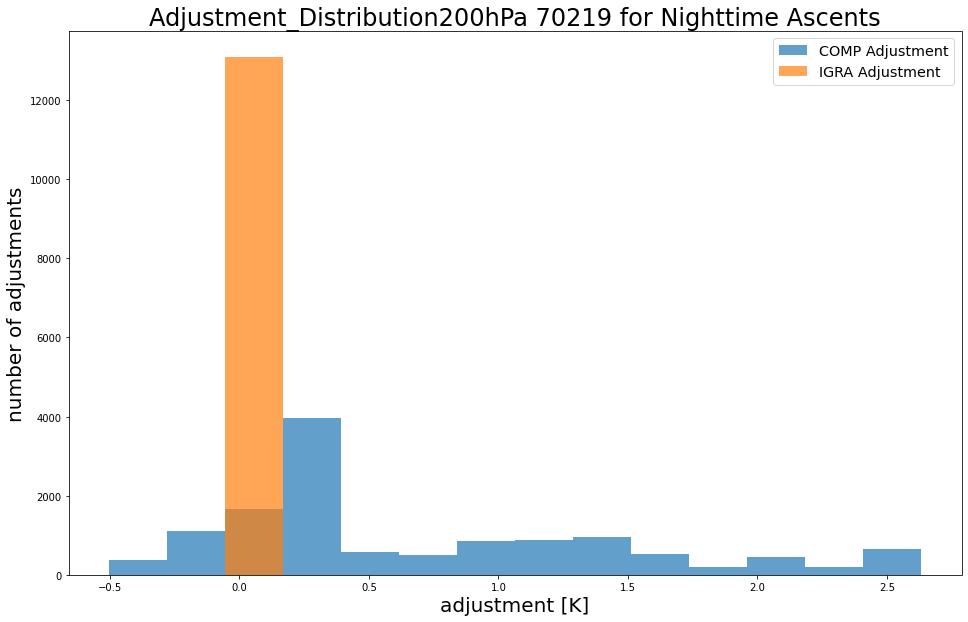

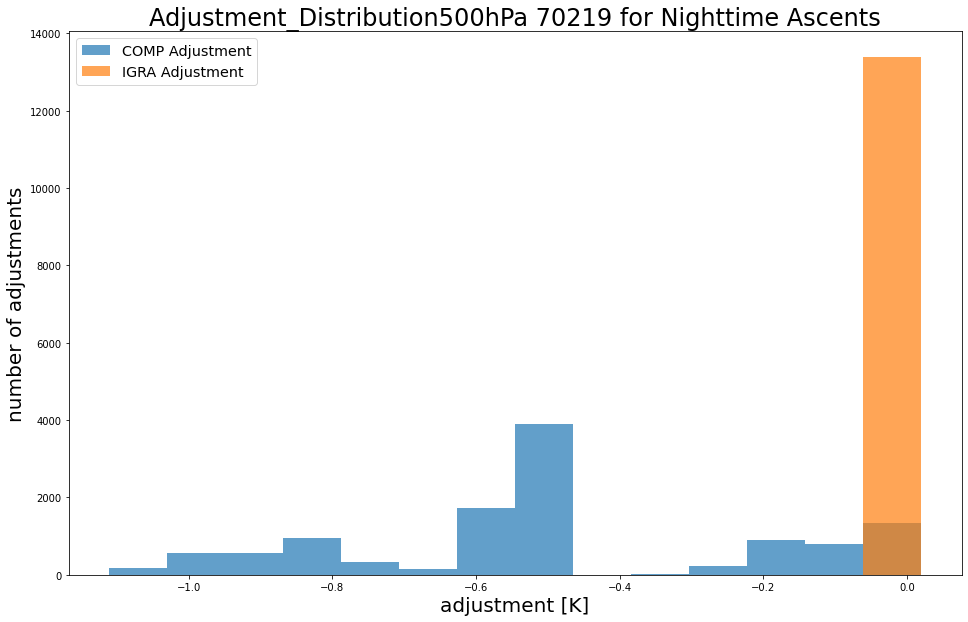

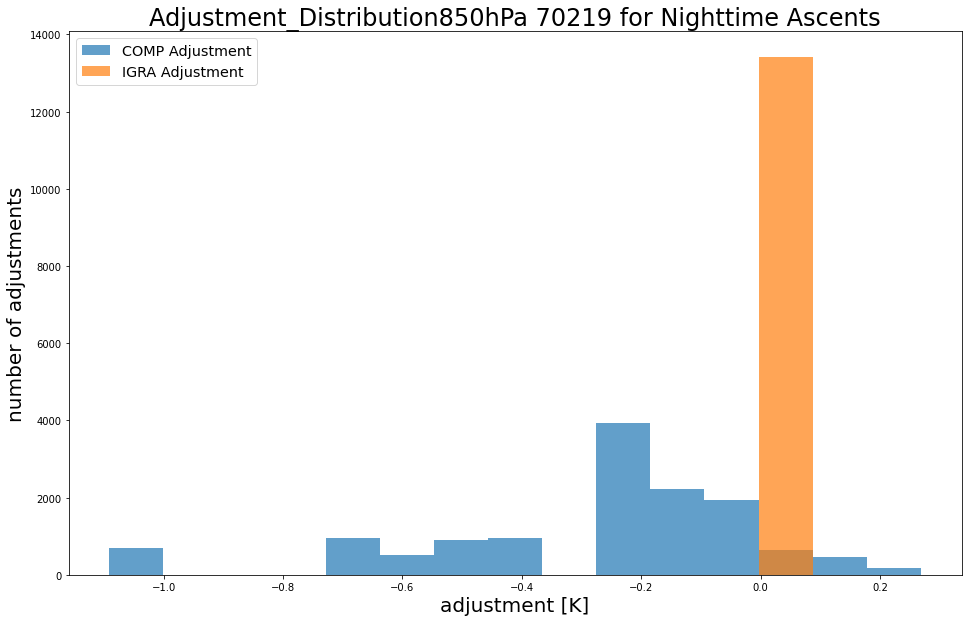

In [32]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)